# Noise issue analysis

In [44]:
import numpy as np
import matplotlib.pyplot as plot
import math
from scipy import signal

## Definitions

In [154]:
samplingFrequency = 44100;
bl = 24
fs_dbspl = 120
fs_dbfs = 20*np.log10(np.power(2, bl))

samples_n = 512
time = np.arange(0, samples_n)/44100
window = signal.hann(samples_n)

values      = np.arange(int(samples_n/2))
timePeriod  = samples_n/samplingFrequency
bins = values/timePeriod

# This comes from the tests carried out in anechoic chamber - microphone equalisation
equal_table = np.array([1, 0.848889906157015, 0.816708628976883, 0.772243839169909, 0.827847714961471, 0.798657206073091, 0.815686274509804, 0.816021972991531, 0.753612573434043, 0.798596169985504, 0.780132753490501, 0.741832608529793, 0.757930876630808, 0.754558632791638, 0.744609750514992, 0.707774471656367, 0.710521095597772, 0.684260318913558, 0.660334172579538, 0.638254367895018, 0.611627374685283, 0.61020828564889, 0.566277561608301, 0.519386587319753, 0.508262760357061, 0.48046082246128, 0.439368276493477, 0.428351262684062, 0.39150072480354, 0.392965590905623, 0.397177080949111, 0.350545510032807, 0.36919203479057, 0.355352101930266, 0.368322270542458, 0.400976577401389, 0.34877546349279, 0.383642328526741, 0.42383459220264, 0.359533073929961, 0.355809872587167, 0.352300297550927, 0.349019607843137, 0.345952544441901, 0.343099107347219, 0.340444037537194, 0.337987335011826, 0.335744258793011, 0.333684290836957, 0.331807431143664, 0.330128938735027, 0.328633554589151, 0.327321278706035, 0.326176852063783, 0.325215533684291, 0.324437323567559, 0.323826962691691, 0.323399710078584, 0.32314030670634, 0.32304875257496, 0.32314030670634, 0.323399710078584, 0.323826962691691, 0.324437323567559, 0.325215533684291, 0.323750667582208, 0.324788281071183, 0.323399710078584, 0.324696726939803, 0.323399710078584, 0.322102693217365, 0.320805676356146, 0.319523918516823, 0.318242160677501, 0.316975661860075, 0.318928816662852, 0.321065079728389, 0.323399710078584, 0.322362096589609, 0.321324483100633, 0.320302128633555, 0.319264515144579, 0.322102693217365, 0.32115663385977, 0.320210574502174, 0.323399710078584, 0.322529945830472, 0.321675440604257, 0.320805676356146, 0.319951171129931, 0.319096665903716, 0.318242160677501, 0.317402914473182, 0.316548409246967, 0.306340123598077, 0.314747844663157, 0.298863202868696, 0.311482413977264, 0.303791866941329, 0.313374532692454, 0.319325551232166, 0.324910353246357, 0.322056916151675, 0.321950102998398, 0.294804303044175, 0.293965056839857, 0.266910811017014, 0.246494239719234, 0.245273517967498, 0.216144045166705, 0.222568093385214, 0.197528038452735, 0.208468757152667, 0.192813000686656, 0.201541161211566, 0.187212939650568, 0.193469138628214, 0.167833981841764, 0.165789272907607, 0.162188143739986, 0.159822995345998, 0.159929808499275, 0.16424811169604, 0.153292133974212, 0.152666514076448, 0.164217593652247, 0.156740672922866, 0.160753795681697, 0.158693827725643, 0.155031662470436, 0.159807736324102, 0.156328679331655, 0.160433356221866, 0.167025253681239, 0.176745250629435, 0.180514229037919, 0.185488670176242, 0.174837872892348, 0.18286411841001, 0.189150835431449, 0.197878995956359, 0.202883955138476, 0.200411993591211, 0.208880750743877, 0.216250858319982, 0.22244602121004, 0.229129472800793, 0.229571984435798, 0.23778133821622, 0.22882429236286, 0.247241931792172, 0.231219958800641, 0.24951552605478, 0.250568398565652, 0.250522621499962, 0.272587167162585, 0.265461203936828, 0.282551308461128, 0.287602044708934, 0.290196078431373, 0.299763485160601, 0.308796826123445, 0.320469977874418, 0.32309452964065, 0.34554055085069, 0.33852140077821, 0.370870527199207, 0.375478751812009, 0.425741969939727, 0.438483253223468, 0.50078583962768, 0.478324559395743, 0.520256351567865, 0.506080720225834, 0.522178988326848, 0.468558785381857, 0.508628976882582, 0.46300450141146, 0.509086747539483, 0.489753566796368, 0.488746471351186, 0.477958342870222, 0.473899443045701, 0.461951628900587, 0.449210345616846, 0.412420843823911, 0.426764324406806, 0.400411993591211, 0.428397039749752, 0.401022354467079, 0.414465552758068, 0.412130922407874, 0.444357976653696, 0.445990691996643, 0.446433203631647, 0.471351186388952, 0.443183031967651, 0.495033188372625, 0.477515831235218, 0.498634317540246, 0.504005493247883, 0.516411078049897, 0.50595864805066, 0.527428091859312, 0.496437018387121, 0.522346837567712, 0.508705271992065, 0.503440909437705, 0.501503013656825, 0.47875181200885, 0.478858625162127, 0.464103150988022, 0.494163424124514, 0.443808651865415, 0.479514763103685, 0.443671320668345, 0.46152437628748, 0.427100022888533, 0.433127336537728, 0.402548256656748, 0.388525215533684, 0.379278248264286, 0.36231021591516, 0.35916685740444, 0.348668650339513, 0.366124971389334, 0.365438315403983, 0.359609369039445, 0.352971694514382, 0.330098420691234, 0.327229724574655, 0.332188906691081, 0.32831311512932, 0.323643854428931, 0.320241092545968, 0.312504768444343, 0.304661631189441, 0.318120088502327, 0.3006942854963, 0.296787975890745, 0.292393377584497, 0.275577935454337, 0.278171969176776, 0.272068360418097, 0.27510490577554, 0.270679789425498, 0.260959792477302, 0.271000228885328, 0.241046768902113, 0.255695429922942, 0.236179140917067, 0.229800869764248, 0.227847714961471, 0.216586556801709, 0.21889066910811, 0.215884641794461])

# equal_table << 16 or by 65535
equal_table_kit = np.array([65535,55632,53523,50609,54253,52340,53456,53478,49388,52336,51126,48616,49671,49450,48798,46384,46564,44843,43275,41828,40083,39990,37111,34038,33309,31487,28794,28072,25657,25753,26029,22973,24195,23288,24138,26278,22857,25142,27776,23562,23318,23088,22873,22672,22485,22311,22150,22003,21868,21745,21635,21537,21451,21376,21313,21262,21222,21194,21177,21171,21177,21194,21222,21262,21313,21217,21285,21194,21279,21194,21109,21024,20940,20856,20773,20901,21041,21194,21126,21058,20991,20923,21109,21047,20985,21194,21137,21081,21024,20968,20912,20856,20801,20745,20076,20627,19586,20413,19909,20537,20927,21293,21106,21099,19320,19265,17492,16154,16074,14165,14586,12945,13662,12636,13208,12269,12679,10999,10865,10629,10474,10481,10764,10046,10005,10762,10272,10535,10400,10160,10473,10245,10514,10946,11583,11830,12156,11458,11984,12396,12968,13296,13134,13689,14172,14578,15016,15045,15583,14996,16203,15153,16352,16421,16418,17864,17397,18517,18848,19018,19645,20237,21002,21174,22645,22185,24305,24607,27901,28736,32819,31347,34095,33166,34221,30707,33333,30343,33363,32096,32030,31323,31057,30274,29439,27028,27968,26241,28075,26281,27162,27009,29121,29228,29257,30890,29044,32442,31294,32678,33030,33843,33158,34565,32534,34232,33338,32993,32866,31375,31382,30415,32385,29085,31425,29076,30246,27990,28385,26381,25462,24856,23744,23538,22850,23994,23949,23567,23132,21633,21445,21770,21516,21210,20987,20480,19966,20848,19706,19450,19162,18060,18230,17830,18029,17739,17102,17760,15797,16757,15478,15060,14932,14194,14345,14148])
equal_table_kit = equal_table_kit/65535

# weighting tables in the kit - combined with the equalisation table above
a_weight_table_comb_kit = np.array([5634,13278,20377,25571,33231,36831,41717,45166,44354,49335,50092,49140,51493,52337,52535,50645,51438,50019,48660,47347,45621,45720,42583,39168,38415,36373,33300,32487,29699,29808,30115,26560,27943,26862,27801,30214,26229,28790,31734,26853,26504,26170,25850,25544,25252,24974,24709,24457,24218,23991,23777,23575,23385,23206,23040,22885,22741,22608,22486,22375,22275,22185,22106,22038,21980,21769,21727,21521,21494,21293,21094,20895,20696,20499,20302,20312,20332,20361,20178,19996,19814,19634,19689,19513,19338,19412,19241,19071,18902,18734,18567,18400,18235,18071,17376,17738,16734,17327,16790,17207,17418,17606,17336,17216,15660,15511,13990,12832,12683,11102,11355,10008,10491,9638,10005,9231,9473,8162,8007,7779,7613,7565,7716,7151,7073,7556,7161,7294,7150,6936,7101,6897,7029,7267,7636,7744,7902,7396,7681,7890,8197,8345,8186,8472,8709,8896,9099,9053,9311,8898,9547,8866,9500,9474,9406,10163,9829,10388,10500,10521,10792,11040,11378,11392,12099,11771,12807,12876,14499,14830,16820,15955,17235,16650,17062,15204,16392,14820,16183,15462,15325,14885,14658,14192,13707,12499,12846,11972,12722,11829,12144,11994,12845,12806,12733,13354,12473,13839,13261,13756,13812,14058,13683,14170,13249,13849,13399,13174,13038,12365,12287,11832,12516,11168,11989,11021,11391,10473,10553,9745,9346,9065,8604,8475,8175,8531,8461,8273,8070,7499,7388,7452,7320,7170,7051,6838,6625,6875,6458,6335,6203,5810,5829,5667,5695,5569,5337,5508,4870,5135,4714,4559,4493,4246,4265,4182])
c_weight_table_comb_kit = np.array([62418,55227,53541,50749,54449,52537,53645,53642,49507,52420,51160,48597,49593,49309,48592,46119,46224,44440,42810,41300,39499,39326,36416,33324,32534,30680,27984,27211,24802,24825,25019,22016,23116,22180,22915,24864,21553,23625,26008,21982,21673,21379,21097,20830,20575,20332,20102,19883,19676,19480,19295,19121,18957,18804,18660,18527,18402,18288,18183,18087,18000,17922,17853,17792,17741,17566,17527,17357,17331,17165,17001,16837,16674,16512,16351,16356,16369,16390,16240,16091,15943,15795,15838,15694,15551,15608,15469,15331,15194,15057,14921,14786,14652,14518,13959,14249,13441,13916,13483,13817,13986,14136,13918,13821,12571,12451,11229,10299,10179,8909,9112,8031,8418,7732,8027,7405,7600,6547,6423,6240,6106,6068,6189,5735,5672,6059,5742,5849,5733,5561,5693,5530,5635,5826,6121,6208,6335,5929,6157,6325,6570,6689,6561,6790,6980,7129,7292,7255,7462,7130,7650,7104,7613,7591,7537,8143,7875,8323,8413,8430,8647,8845,9116,9127,9693,9430,10259,10315,11615,11880,13474,12781,13805,13337,13666,12179,13129,11870,12962,12384,12275,11922,11740,11366,10978,10011,10288,9588,10189,9473,9725,9605,10287,10255,10197,10694,9988,11082,10619,11015,11060,11257,10957,11346,10609,11089,10729,10548,10439,9901,9838,9473,10021,8942,9599,8824,9120,8385,8449,7802,7482,7258,6889,6786,6545,6830,6774,6624,6460,6004,5914,5966,5860,5740,5645,5474,5304,5504,5170,5072,4966,4651,4666,4536,4559,4458,4272,4409,3898,4110,3774,3650,3597,3399,3414,3347])

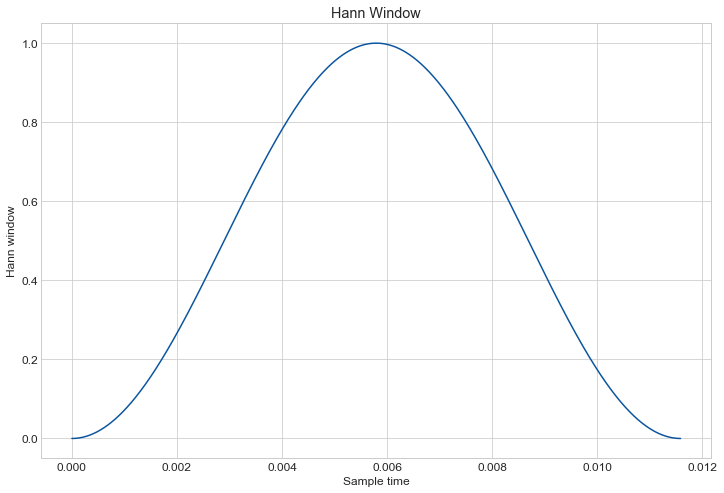

In [156]:
# plot window
fig, ax = plot.subplots(figsize = (12,8))
plot.plot(time, window)
plot.title('Hann Window')
plot.xlabel('Sample time')
plot.ylabel('Hann window')
plot.grid(True)
plot.show()

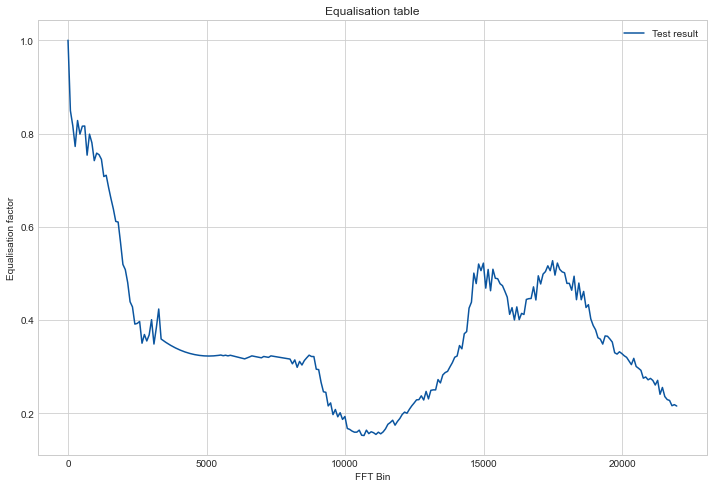

In [81]:
# plot equalisation
fig, ax = plot.subplots(figsize = (12,8))
plot.plot(bins, equal_table, label = 'Test result')
plot.title('Equalisation table')
plot.xlabel('FFT Bin')
plot.ylabel('Equalisation factor')
plot.legend()
plot.grid(True)
plot.show()
fig.savefig('/Users/macoscar/Desktop/equal.png', dpi = 300, transparent=False, bbox_inches='tight')

## Funtions

In [94]:
def rms (_samples):
    ms = 0
    for i in range(0, len(_samples)-1):
        ms += np.power(_samples[i],2)
    ms = ms/len(_samples)
    return math.sqrt(ms)

def db (_val):
    return fs_dbspl-(fs_dbfs-20*np.log10(math.sqrt(2)*_val))
    
# From https://en.wikipedia.org/wiki/A-weighting
def aw_wiki(_freq, _asdb = False):
    ra_n = np.power(12194, 2) * np.power(_freq,4)
    ra_d1 = np.power(_freq, 2) + np.power(20.6, 2)
    
    ra_d21 = np.power(_freq, 2) + np.power(107.7, 2)
    ra_d22 = np.power(_freq, 2) + np.power(737.9, 2)

    ra_d2 = np.sqrt(ra_d21 * ra_d22)
    
    ra_d3 = np.power(_freq, 2) + np.power(12194, 2)
    
    ra = ra_n / (ra_d1 * ra_d2 * ra_d3)
    
    aw = 20*np.log10(ra) + 2
    
    if _asdb: aw = np.power(10, aw/20)
    
    return aw

def cw_wiki(_freq, _asdb = False):
    rc_n = np.power(12194, 2) * np.power(_freq,2)
    rc_d1 = np.power(_freq, 2) + np.power(20.6, 2)
    rc_d2 = np.power(_freq, 2) + np.power(12194, 2)
    
    rc = rc_n / (rc_d1 * rc_d2)
    
    cw = 20*np.log10(rc) + 0.06
    
    if _asdb: cw = np.power(10, cw/20)
    
    return cw

def aw_norm(_freq, _asdb = False):
    # From a different source - to double check
    fA = 10**2.45;
    fL = 10**1.5;
    fH = 10**3.9;
    fr = 1000;
    D = np.abs(math.sqrt(0.5));

    b = (1/(1-D))*(fr**2+fL**2*fH**2/fr**2-D*(fL**2+fH**2));
    c = fL**2*fH**2

    f1 = ((-b-math.sqrt(b**2-4*c))/2)**0.5;
    f4 = ((-b+math.sqrt(b**2-4*c))/2)**0.5;

    f2 = (3-math.sqrt(5))/2*fA;
    f3 = (3+math.sqrt(5))/2*fA;

    A1000 = -2;
    A1000 = -2;
    C1000 = -0.062;

    aw = 20 * np.log10((f4**2*_freq**4)/((((_freq**2)+(f1**2))*((_freq**2)+(f2**2))**0.5)*(((_freq**2)+f3**2)**0.5)*(_freq**2+f4**2)))-A1000;
    
    if _asdb: aw = 10**(aw/20)
    return aw

[0.09294374]
[0.09313793]
[-0.00540393]


/Users/macoscar/.virtualenvs/scdata/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning:

divide by zero encountered in log10

/Users/macoscar/.virtualenvs/scdata/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning:

divide by zero encountered in log10



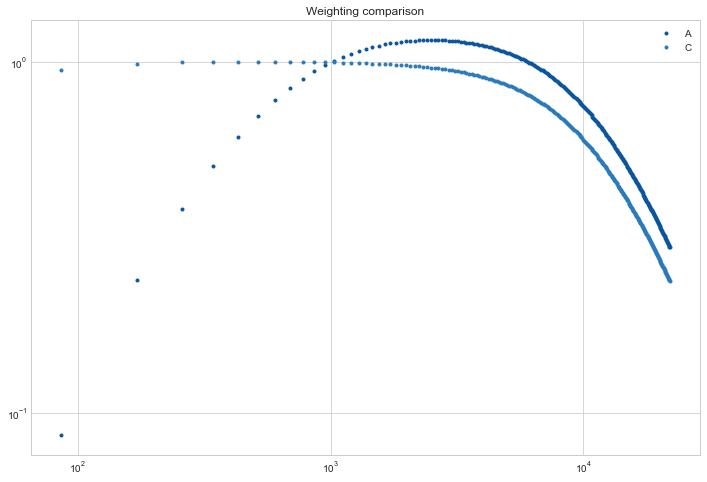

In [95]:
print (aw_wiki(np.array([1031.57894736842], dtype = np.float64), False))
print (aw_norm(np.array([1031.57894736842], dtype = np.float64), False))
print (cw_wiki(np.array([1031.57894736842], dtype = np.float64), False))

# Just checking everything matches
set_palette('Blues_r')
fig, ax = plot.subplots(figsize = (12, 8))
ax.loglog(bins, aw_wiki(bins, True), '.', label='A')
#ax.loglog(bins, aw_norm(bins, True), '.', label='a-norm')
ax.loglog(bins, cw_wiki(bins, True), '.', label='C')
plot.title('Weighting comparison')
plot.legend()
plot.grid(True)
plot.show()
fig.savefig('/Users/macoscar/Desktop/weight.png', dpi = 300, transparent=False, bbox_inches='tight')

## Samples

In [96]:
time = np.arange(0, samples_n)/44100

samplesd = {
    1: {
        'samples': np.array([-273800, -275809, -272632, -271624, -265265, -264240, -260485, -261900, -258305, -260821, -262165, -264760, -264617, -261873, -257588, -262269, -259657, -261852, -262564, -261993, -251972, -248684, -247696, -248164, -245645, -245533, -246129, -249545, -242565, -247204, -243949, -242572, -229072, -223640, -224580, -227960, -227845, -225729, -225600, -226217, -227868, -227129, -225817, -223844, -223240, -224732, -226824, -226329, -232377, -239465, -240480, -242000, -239605, -248037, -249584, -260433, -256592, -264109, -271593, -276864, -276004, -275028, -278384, -284048, -279645, -275664, -270364, -262845, -263025, -257272, -252013, -242856, -233137, -234132, -231548, -236920, -233036, -230852, -219221, -213452, -209817, -207581, -206873, -210292, -209168, -210313, -205912, -199352, -202881, -203484, -203457, -206373, -209033, -213808, -216905, -214889, -220261, -226412, -231516, -230101, -236313, -243660, -249096, -259984, -260517, -257240, -257497, -256681, -259501, -251076, -251737, -243845, -245837, -248549, -244884, -241016, -235780, -228485, -223245, -217104, -216281, -213173, -207992, -201352, -192820, -191681, -191737, -188689, -183981, -186473, -185072, -187841, -191476, -196160, -198301, -198420, -201137, -203408, -209048, -214153, -221164, -226272, -228448, -227069, -228820, -231637, -234637, -235052, -232896, -230488, -228084, -227837, -222000, -225468, -224628, -224216, -222085, -224208, -217873, -215785, -213816, -212497, -207240, -200552, -194257, -194612, -200485, -199744, -197660, -196032, -194589, -192997, -196385, -192033, -190609, -192196, -195552, -200333, -196644, -195369, -191400, -194309, -194140, -195577, -199513, -204073, -205933, -214140, -217781, -217197, -219200, -218760, -218221, -223897, -225713, -229444, -228104, -226789, -227660, -227792, -229789, -226013, -227033, -225037, -214776, -211013, -203564, -201048, -197964, -192892, -187636, -184448, -177552, -176041, -167512, -163393, -157781, -156212, -153300, -160785, -161621, -164668, -164444, -171205, -167024, -176356, -177956, -190804, -199492, -212212, -219869, -224825, -230584, -235288, -235761, -238980, -239028, -235964, -229232, -229753, -226357, -223360, -225240, -221672, -217412, -213364, -210049, -204041, -201849, -196265, -190244, -186877, -176941, -169457, -167521, -162653, -159104, -164189, -167020, -165445, -163437, -160380, -160252, -164633, -167352, -173053, -180232, -185004, -184616, -186008, -189253, -190232, -192212, -196072, -198648, -201257, -208376, -208536, -210560, -207265, -206545, -209664, -210192, -212625, -208428, -209980, -207488, -205244, -205141, -204121, -205384, -201660, -199108, -199220, -194084, -181485, -175248, -164953, -159828, -156848, -151241, -149717, -150509, -151628, -149821, -153081, -153008, -155145, -159148, -159657, -163864, -170820, -175253, -182208, -181352, -189709, -193232, -200772, -204133, -207220, -203925, -207209, -208457, -207892, -203857, -201397, -201477, -204989, -206200, -202620, -194076, -191972, -184413, -185241, -183385, -183253, -173916, -171680, -162665, -162737, -158884, -162968, -158592, -151837, -147800, -150988, -147664, -146545, -141901, -144660, -141705, -144824, -146036, -145633, -152476, -152104, -156829, -163753, -167272, -170741, -173549, -183461, -191140, -195692, -200020, -203901, -202577, -204236, -209029, -209065, -208224, -204965, -204208, -208444, -207405, -205172, -202188, -197485, -188424, -182224, -179545, -178092, -170344, -165328, -157765, -150865, -148313, -142316, -143537, -139744, -141876, -141433, -146132, -142389, -145604, -145897, -148733, -146181, -145560, -142069, -144265, -142889, -150488, -159640, -164276, -169032, -174984, -180073, -182680, -187353, -190828, -187861, -193321, -192577, -196417, -196709, -197328, -199501, -203825, -201737, -202789, -200549, -198437, -193669, -190725, -185568, -180060, -174833, -168701, -166733, -162657, -159664, -155261, -152169, -149493, -150448, -145917, -144652, -137337, -138273, -139981, -147113, -144280, -145977, -139265, -142473, -147609, -150089, -150329, -152384, -152536, -154813, -159672, -164549, -168529, -174093, -174676, -182697, -182208, -182968, -187485, -191217, -190100, -185625, -185052, -181408, -183677, -179708, -174888, -167764, -162013, -153553, -150940, -151133, -145521, -147645, -142653, -140857, -134748, -132032, -128256, -130377, -133860, -131276, -130708, -134124, -140149, -138100, -146064, -145532, -151533, -152716, -154745, -158673, -163713, -167208, -171776, -170481, -168757, -170904, -170593, -170424, -174180, -181133, -179188, -176060, -179004, -175496, -173973, -173761, -169253, -168257]),
        'FFT_KIT_RAW': np.array([1752, 11653, 2539, 1073, 232, 424, 260, 506, 2080, 849, 1571, 11136, 13590, 4979, 1530, 1958, 2166, 2171, 2237, 1412, 1062, 564, 539, 487, 872, 688, 544, 681, 560, 208, 174, 375, 495, 413, 473, 928, 570, 31, 114, 288, 255, 411, 408, 389, 557, 445, 245, 294, 295, 336, 255, 38, 144, 296, 120, 165, 499, 644, 474, 255, 85, 287, 285, 317, 247, 221, 191, 294, 177, 133, 151, 120, 157, 309, 349, 87, 232, 269, 59, 176, 33, 208, 160, 87, 77, 42, 97, 214, 346, 393, 107, 212, 94, 63, 66, 167, 87, 180, 187, 114, 47, 127, 149, 156, 66, 182, 85, 53, 95, 80, 91, 107, 184, 127, 64, 43, 43, 94, 130, 97, 64, 33, 38, 104, 85, 52, 89, 64, 120, 91, 148, 130, 38, 128, 94, 138, 120, 23, 44, 71, 57, 52, 31, 38, 23, 31, 23, 74, 23, 14, 91, 76, 31, 53, 85, 99, 85, 63, 57, 154, 123, 80, 90, 138, 61, 23, 52, 139, 161, 142, 77, 47, 71, 110, 95, 116, 77, 23, 97, 127, 123, 80, 23, 14, 23, 64, 44, 61, 14, 47, 31, 52, 76, 85, 33, 77, 77, 44, 44, 114, 74, 43, 138, 84, 85, 77, 31, 43, 31, 77, 156, 116, 0, 23, 84, 33, 33, 42, 57, 52, 33, 38, 127, 165, 107, 33, 47, 43, 42, 33, 47, 77, 33, 31, 87, 33, 110, 109, 14, 123, 154, 53, 109, 91, 33, 71, 134, 95, 67, 63, 106, 169, 240, 114, 57, 201]),
        'FFT_KIT': np.array([150, 2360, 789, 418, 117, 238, 165, 348, 1407, 639, 1200, 8349, 10677, 3976, 1226, 1513, 1700, 1656, 1660, 1020, 739, 393, 350, 291, 511, 381, 276, 337, 253, 94, 79, 151, 211, 169, 200, 427, 228, 13, 55, 118, 103, 164, 160, 151, 214, 169, 92, 109, 109, 123, 92, 13, 51, 104, 42, 57, 173, 222, 162, 87, 28, 97, 96, 106, 82, 73, 63, 96, 58, 43, 48, 38, 49, 96, 108, 26, 71, 83, 18, 53, 9, 62, 48, 25, 22, 12, 28, 62, 99, 112, 30, 59, 26, 17, 17, 45, 22, 47, 47, 29, 12, 34, 39, 40, 15, 43, 18, 10, 18, 13, 15, 16, 29, 18, 9, 6, 6, 11, 15, 11, 7, 3, 4, 11, 9, 5, 9, 7, 13, 9, 16, 13, 4, 14, 10, 16, 14, 2, 5, 8, 7, 6, 3, 4, 3, 4, 3, 10, 3, 1, 13, 10, 4, 7, 12, 15, 12, 9, 9, 24, 20, 13, 15, 23, 11, 4, 10, 27, 35, 32, 19, 11, 18, 27, 24, 26, 19, 5, 23, 29, 28, 18, 5, 3, 4, 12, 8, 11, 2, 8, 5, 9, 14, 16, 6, 15, 14, 9, 8, 23, 15, 9, 28, 18, 17, 16, 6, 8, 6, 14, 29, 20, 0, 3, 15, 5, 5, 6, 9, 7, 4, 5, 16, 21, 13, 4, 6, 5, 5, 3, 5, 8, 3, 3, 9, 3, 11, 11, 1, 11, 14, 4, 9, 7, 2, 6, 10, 7, 4, 4, 7, 11, 16, 7, 3, 12])
    },
    2: {
        'samples': np.array([-253748, -252629, -251240, -250489, -250521, -250244, -249632, -249700, -249613, -249040, -248421, -249661, -248816, -249821, -250156, -249668, -249040, -250412, -248549, -248709, -246472, -248697, -247709, -248720, -247037, -250724, -248549, -250125, -250037, -248972, -249416, -247904, -247009, -248413, -246316, -247873, -246217, -245081, -245240, -243348, -243756, -240724, -240809, -238649, -238172, -237073, -236136, -235765, -234717, -233344, -232360, -233924, -233109, -235097, -233301, -234321, -233305, -233825, -235129, -235632, -236892, -238465, -239736, -240473, -240164, -241476, -239397, -241425, -239593, -241272, -238792, -239132, -238473, -238741, -239125, -237812, -238165, -236212, -237417, -234980, -236164, -233956, -232781, -231884, -230912, -228944, -228241, -227276, -226716, -225580, -225164, -224433, -225284, -224029, -222345, -222181, -221708, -222092, -221448, -220897, -221781, -220108, -221513, -220813, -222296, -221509, -222356, -221024, -224001, -223120, -226605, -225973, -229108, -228088, -229549, -229369, -231536, -230865, -231760, -231468, -232996, -231916, -233549, -232704, -234569, -233105, -234224, -232133, -233280, -231524, -231896, -228969, -229761, -224772, -226521, -223372, -222989, -219624, -220548, -218144, -218244, -217449, -216832, -215133, -215096, -212184, -211709, -209588, -209117, -208525, -208096, -208673, -209364, -209229, -209080, -210609, -209948, -211900, -210613, -212204, -211316, -213381, -211352, -212961, -212184, -213525, -214472, -215577, -215597, -215633, -216520, -215669, -216628, -215701, -215656, -215732, -216484, -216544, -217613, -216717, -218296, -216309, -218597, -218640, -218005, -217313, -217877, -217001, -215532, -214728, -215280, -213509, -214336, -212576, -213297, -212157, -212517, -211457, -211033, -210617, -208288, -209901, -206501, -207332, -206124, -207209, -204973, -204624, -204637, -203305, -204169, -202204, -202056, -201693, -199569, -200872, -197752, -199921, -197457, -199444, -197077, -197956, -198376, -196977, -196929, -196201, -196757, -197112, -197445, -196416, -199304, -197828, -199685, -200741, -201445, -202328, -202528, -203641, -202845, -204388, -203617, -203757, -204600, -205156, -206077, -207265, -207357, -208644, -206937, -209297, -207409, -208461, -206788, -206629, -206809, -206416, -206384, -205569, -206224, -206225, -205536, -205436, -206804, -204793, -204652, -201497, -201697, -198244, -197533, -196272, -194629, -194440, -193512, -192204, -191489, -190381, -190037, -188921, -187684, -185997, -186852, -185192, -186756, -185853, -187052, -187700, -187501, -189996, -189741, -192005, -193829, -194612, -195301, -196093, -196004, -198585, -197325, -200193, -200560, -200368, -201037, -200736, -202361, -201532, -202113, -201024, -201069, -199921, -201461, -199497, -198832, -197377, -197464, -197677, -195456, -195264, -192300, -192816, -190437, -190032, -187913, -188808, -185945, -186352, -183465, -181721, -182712, -179540, -178301, -177957, -176277, -178008, -175449, -176416, -176325, -176517, -177413, -178196, -178356, -180104, -179917, -183388, -181408, -184865, -184897, -187281, -187997, -189797, -190936, -192176, -193869, -195485, -195880, -195161, -197085, -194876, -195545, -195524, -195537, -193608, -192600, -192089, -190944, -190476, -188089, -187048, -187041, -184949, -185693, -183360, -182593, -181092, -180308, -178696, -178908, -178260, -179696, -177084, -176869, -175724, -176572, -175669, -176004, -176181, -176724, -175844, -176057, -175764, -178133, -176424, -177769, -176065, -177881, -175677, -177844, -176940, -177149, -177601, -178868, -177373, -178101, -177836, -178556, -178468, -178897, -177009, -176745, -176920, -177085, -178065, -177284, -177048, -179072, -178584, -179280, -178624, -179401, -178789, -177840, -177572, -175781, -178636, -175553, -177801, -174749, -176869, -174249, -177240, -175945, -176669, -176716, -177028, -178193, -176925, -177964, -176216, -177513, -175808, -177513, -177108, -176640, -178669, -176877, -179064, -175220, -177168, -175321, -174876, -175480, -174152, -172060, -172612, -169796, -169873, -165597, -165696, -165149, -164289, -164132, -162536, -161344, -160341, -160504, -161144, -161516, -161961, -163480, -161188, -163424, -164184, -166097, -165365, -167245, -165396, -168293, -166821, -169508, -167985, -170284, -168945, -171100, -169749, -170621, -170201, -170184, -169793, -169812, -167657, -169172, -167317, -167300, -166921, -166369, -166681, -166085, -163192, -162113, -161060, -161245, -160001, -159409, -158868, -157541, -158209, -156845, -156525, -156129, -154752, -154445, -153349, -153472, -151708]),
        'FFT_KIT_RAW': np.array([699, 9847, 1939, 921, 252, 499, 739, 709, 2626, 3153, 1595, 1982, 1109, 364, 215, 88, 323, 308, 376, 293, 175, 62, 45, 32, 45, 57, 50, 51, 31, 31, 44, 49, 49, 146, 160, 102, 19, 138, 147, 223, 133, 76, 22, 44, 8, 6, 39, 19, 22, 32, 33, 35, 28, 8, 71, 18, 19, 32, 63, 50, 66, 6, 6, 14, 25, 17, 25, 50, 19, 8, 25, 17, 40, 18, 25, 25, 25, 45, 45, 22, 19, 32, 28, 64, 14, 12, 36, 25, 31, 12, 42, 25, 14, 22, 37, 44, 28, 14, 44, 22, 6, 19, 35, 26, 8, 32, 19, 28, 33, 32, 25, 26, 22, 63, 67, 40, 8, 36, 17, 8, 31, 14, 25, 31, 31, 14, 14, 32, 12, 39, 18, 8, 12, 6, 0, 17, 8, 28, 25, 6, 22, 17, 35, 63, 44, 19, 17, 28, 14, 8, 6, 6, 22, 14, 12, 8, 22, 22, 8, 12, 32, 40, 45, 18, 8, 28, 28, 12, 22, 8, 6, 25, 19, 8, 25, 31, 31, 45, 25, 17, 26, 25, 40, 17, 8, 38, 19, 12, 8, 18, 8, 8, 8, 22, 14, 25, 49, 62, 50, 40, 59, 58, 28, 45, 31, 19, 50, 54, 36, 12, 63, 56, 49, 58, 62, 22, 14, 17, 12, 58, 50, 64, 50, 50, 76, 59, 56, 53, 64, 77, 45, 66, 33, 81, 63, 69, 101, 42, 14, 32, 58, 40, 45, 71, 127, 98, 57, 63, 59, 22, 98, 63, 122, 31, 75, 63]),
        'FFT_KIT': np.array([60, 1995, 602, 359, 127, 280, 470, 488, 1777, 2373, 1219, 1486, 871, 290, 172, 68, 253, 235, 279, 211, 121, 43, 29, 19, 26, 31, 25, 25, 14, 14, 20, 19, 20, 59, 67, 47, 7, 60, 71, 91, 53, 30, 8, 17, 3, 2, 14, 7, 8, 11, 11, 12, 9, 2, 24, 6, 6, 11, 21, 17, 22, 2, 2, 4, 8, 5, 8, 16, 6, 2, 8, 5, 12, 5, 7, 7, 7, 13, 13, 6, 5, 9, 8, 19, 4, 3, 10, 7, 8, 3, 11, 7, 3, 6, 9, 11, 7, 3, 11, 5, 1, 5, 9, 6, 1, 7, 4, 5, 6, 5, 4, 3, 3, 9, 10, 5, 1, 4, 2, 0, 3, 1, 2, 3, 3, 1, 1, 3, 1, 4, 1, 0, 1, 0, 0, 2, 0, 3, 2, 0, 2, 2, 4, 8, 5, 2, 2, 3, 1, 1, 0, 0, 3, 2, 1, 1, 3, 3, 1, 1, 5, 6, 7, 3, 1, 5, 5, 2, 4, 1, 1, 6, 4, 2, 6, 7, 7, 10, 6, 4, 6, 5, 8, 3, 1, 7, 3, 2, 1, 3, 1, 1, 1, 4, 2, 5, 9, 13, 10, 8, 12, 12, 5, 9, 6, 4, 10, 10, 7, 2, 11, 10, 9, 9, 11, 3, 2, 2, 1, 8, 7, 8, 6, 6, 9, 7, 7, 6, 7, 8, 5, 7, 3, 8, 6, 7, 10, 4, 1, 3, 5, 3, 4, 6, 11, 8, 4, 5, 4, 1, 7, 4, 8, 2, 4, 4])        
    },
    3: {
        'samples': np.array([-239769, -238992, -238129, -237596, -236656, -236037, -235568, -235152, -234972, -234933, -234732, -234260, -233864, -232605, -232512, -231129, -231232, -230681, -230352, -230709, -230004, -230297, -230169, -229936, -229236, -227797, -226781, -225112, -224085, -222641, -223257, -221616, -222033, -221253, -220752, -220221, -219988, -219469, -217361, -217656, -214592, -215653, -212789, -213945, -212173, -213873, -211284, -212913, -211120, -212024, -209357, -210444, -208565, -207861, -205484, -206056, -205133, -206361, -205640, -205641, -206385, -205177, -205096, -206472, -204709, -205201, -202280, -202232, -199480, -200537, -200712, -199580, -201173, -199269, -200700, -199949, -199648, -199341, -198029, -198348, -195572, -196045, -194257, -193777, -193908, -194797, -194057, -194384, -195161, -194680, -193509, -193833, -192873, -193269, -190552, -190589, -188897, -189725, -187717, -188845, -188485, -189556, -189749, -190788, -190708, -191217, -190989, -190392, -190973, -190080, -190568, -189288, -190700, -189824, -191696, -190624, -191705, -192641, -193224, -193348, -192257, -192121, -191949, -192220, -191185, -190516, -191149, -189624, -190412, -188920, -189864, -190021, -189189, -189301, -186937, -187965, -186077, -186888, -187376, -186469, -186073, -186781, -186741, -186960, -187160, -187312, -187136, -187369, -186668, -186365, -184608, -185036, -184181, -186260, -185193, -186412, -186940, -186652, -185585, -188004, -186317, -187729, -185761, -187240, -185789, -186344, -187812, -188496, -189368, -190888, -191317, -193401, -192720, -194132, -193437, -194277, -194013, -193620, -193417, -194449, -193748, -195505, -193564, -195861, -194724, -195984, -194269, -193364, -195224, -194420, -194920, -193440, -194185, -194612, -194428, -194492, -195532, -196985, -197621, -196644, -198320, -197192, -197317, -197405, -198036, -196680, -196561, -195957, -196933, -195884, -197957, -197112, -197656, -196713, -196825, -197484, -196732, -197609, -198021, -197497, -197929, -199860, -199009, -201961, -201292, -204432, -202557, -205172, -204580, -204585, -205556, -204836, -206121, -206448, -205597, -206425, -206249, -205965, -206541, -206908, -206520, -206989, -206493, -206272, -206521, -205877, -205797, -204885, -205741, -205221, -206077, -206469, -207877, -207997, -208065, -207209, -209124, -207245, -209356, -208413, -209972, -208100, -209852, -209705, -210257, -211225, -211944, -210964, -212448, -211505, -212516, -211852, -212373, -211597, -212825, -211780, -212549, -212621, -212852, -213824, -213692, -213781, -213768, -214432, -213233, -214108, -214293, -213001, -213601, -213096, -214337, -212997, -214344, -213113, -213400, -212496, -212224, -210961, -210629, -210141, -210320, -208657, -209365, -207361, -208909, -207237, -207064, -206629, -205473, -205164, -204021, -203385, -202149, -202260, -201709, -200796, -201248, -200048, -200737, -200313, -201505, -202056, -202660, -203028, -203569, -204260, -204161, -206496, -204436, -207165, -205720, -207265, -206225, -208521, -205956, -207876, -206261, -207621, -206832, -205917, -206580, -205852, -205652, -203625, -204108, -203505, -202241, -201805, -201640, -200716, -198612, -199213, -198369, -197012, -197725, -195700, -196436, -195569, -194937, -195084, -195553, -193940, -194337, -193569, -194013, -193693, -192208, -193128, -192148, -192465, -193669, -191877, -193596, -192912, -192917, -191940, -192825, -191048, -191044, -190220, -190496, -189333, -190641, -188477, -188773, -187468, -188124, -188453, -187085, -189136, -187505, -187800, -188116, -186597, -185448, -184885, -184576, -184353, -184712, -183617, -182996, -181409, -182541, -179692, -181088, -179889, -179421, -178425, -177728, -177612, -177549, -178436, -175688, -176980, -176649, -177749, -177957, -178745, -180481, -178969, -180545, -179893, -180585, -181096, -180220, -179641, -180688, -179317, -179544, -178533, -178788, -177905, -178125, -177513, -176557, -175956, -174596, -174128, -171996, -172476, -170572, -169988, -170100, -170504, -169365, -169252, -170028, -168888, -168388, -168581, -166724, -168069, -166321, -168289, -165768, -166757, -165353, -164780, -164857, -163592, -164412, -164016, -164613, -164141, -165245, -164689, -164113, -164693, -164841, -164537, -165669, -165060, -164825, -165793, -164952, -164693, -165213, -166060, -165748, -166513, -166161, -165480, -166381, -164777, -164788, -164521, -162917, -163636, -162805, -161037, -161264, -160456, -159652, -158549, -158905, -157152, -157948, -153908, -155693, -151792, -152485, -150645, -150669, -148569, -149832, -149920, -148301, -148228, -146893, -148045, -146308, -147068]),
        'FFT_KIT_RAW': np.array([2098, 5911, 6453, 1779, 229, 448, 597, 722, 182, 810, 1028, 551, 401, 215, 261, 329, 382, 292, 222, 242, 176, 124, 47, 97, 48, 76, 21, 24, 74, 13, 84, 75, 18, 83, 50, 26, 79, 197, 243, 101, 13, 18, 54, 16, 24, 34, 29, 17, 45, 29, 24, 44, 41, 13, 29, 26, 29, 13, 17, 64, 5, 18, 16, 47, 16, 24, 17, 18, 5, 31, 48, 31, 31, 55, 54, 52, 26, 42, 5, 0, 13, 23, 21, 37, 24, 24, 31, 21, 0, 16, 39, 11, 29, 16, 13, 26, 8, 37, 13, 21, 26, 29, 17, 18, 16, 17, 16, 16, 39, 5, 5, 44, 8, 13, 24, 11, 39, 24, 8, 21, 21, 29, 35, 11, 13, 41, 17, 24, 29, 16, 8, 29, 34, 13, 8, 5, 5, 5, 50, 29, 5, 29, 21, 17, 11, 8, 21, 5, 29, 44, 48, 17, 5, 5, 5, 11, 13, 5, 31, 18, 13, 24, 11, 42, 17, 29, 31, 5, 8, 11, 13, 0, 33, 54, 37, 21, 21, 8, 18, 18, 23, 8, 13, 8, 8, 48, 34, 29, 16, 18, 31, 41, 18, 5, 24, 13, 11, 16, 18, 29, 37, 29, 31, 31, 34, 42, 75, 63, 21, 42, 11, 37, 55, 17, 8, 34, 49, 24, 67, 34, 74, 53, 29, 21, 42, 35, 24, 48, 24, 41, 26, 65, 89, 45, 21, 11, 44, 58, 68, 41, 11, 37, 13, 24, 31, 85, 100, 105, 76, 52, 102, 57, 78, 77, 76, 60]),
        'FFT_KIT': np.array([180, 1197, 2006, 694, 116, 251, 380, 497, 123, 609, 785, 413, 315, 171, 209, 254, 299, 222, 164, 174, 122, 86, 30, 57, 28, 42, 10, 11, 33, 5, 38, 30, 7, 34, 21, 11, 31, 86, 117, 41, 5, 7, 21, 6, 9, 12, 10, 6, 16, 10, 8, 15, 14, 4, 10, 9, 10, 4, 5, 21, 1, 6, 5, 15, 5, 7, 5, 5, 1, 10, 15, 9, 9, 17, 16, 16, 8, 13, 1, 0, 3, 6, 6, 11, 7, 7, 9, 6, 0, 4, 11, 3, 8, 4, 3, 7, 2, 9, 3, 5, 6, 7, 4, 4, 3, 4, 3, 3, 7, 0, 0, 6, 1, 1, 3, 1, 5, 2, 0, 2, 2, 3, 4, 1, 1, 4, 1, 2, 3, 1, 0, 3, 3, 1, 0, 0, 0, 0, 5, 3, 0, 3, 2, 2, 1, 1, 2, 0, 4, 5, 6, 2, 0, 0, 0, 1, 1, 0, 4, 2, 2, 4, 1, 7, 3, 5, 6, 0, 1, 2, 3, 0, 8, 13, 9, 4, 5, 1, 4, 4, 5, 1, 2, 1, 1, 9, 6, 5, 3, 3, 5, 7, 3, 0, 4, 2, 2, 3, 3, 6, 7, 6, 6, 6, 6, 8, 15, 12, 4, 7, 2, 6, 10, 2, 1, 5, 8, 3, 10, 5, 10, 7, 3, 2, 5, 4, 3, 6, 2, 4, 2, 7, 9, 4, 2, 1, 4, 6, 6, 3, 1, 3, 1, 2, 2, 7, 8, 8, 5, 4, 7, 3, 5, 4, 4, 3])        
    },
    4: {
        'samples': np.array([-254125, -254125, -252532, -252041, -251376, -251332, -249337, -251136, -248429, -248888, -247936, -247077, -245564, -244556, -244521, -243892, -243841, -242464, -243345, -242177, -240968, -240345, -240281, -239400, -238953, -239712, -238996, -238244, -240148, -238464, -239548, -238165, -238801, -236520, -236072, -237369, -235689, -237141, -236372, -237137, -237644, -236161, -237485, -236484, -234905, -234821, -234665, -233609, -234036, -232748, -234756, -233856, -234177, -233393, -233193, -231564, -231845, -231408, -230149, -230941, -229548, -229772, -229796, -228025, -228660, -227660, -226953, -228016, -225549, -228013, -225217, -227692, -226469, -226988, -226121, -226481, -224464, -226097, -224848, -225073, -225649, -225589, -225893, -225744, -225320, -223968, -225773, -224132, -223892, -223497, -223104, -222676, -223472, -222908, -221720, -221044, -222169, -221560, -220481, -220020, -219952, -219664, -219893, -218973, -218417, -218752, -217640, -217297, -218345, -217796, -217916, -216933, -216881, -217252, -217833, -216801, -217420, -216728, -216573, -216536, -216109, -217029, -215269, -216500, -216021, -216180, -215597, -216800, -214704, -216092, -214385, -215213, -215228, -214576, -214600, -214725, -213989, -213672, -214421, -212545, -214120, -212184, -213612, -212737, -212532, -212468, -211569, -210589, -211381, -210980, -211293, -210556, -209576, -210312, -209140, -210284, -208813, -209165, -208244, -209700, -208568, -210028, -208921, -209960, -207985, -209565, -208385, -209541, -208532, -209309, -207477, -207836, -207361, -208528, -206800, -207809, -206541, -207012, -206804, -206541, -207645, -207236, -206120, -206396, -206732, -204505, -206105, -204936, -204549, -205104, -204917, -204428, -205561, -204764, -205993, -205360, -205616, -205585, -205864, -204409, -206124, -203960, -206505, -204276, -205625, -206268, -205244, -205793, -205533, -205333, -206817, -205553, -205573, -204128, -204224, -203332, -205385, -202737, -203033, -202573, -202345, -202224, -202165, -202304, -202269, -201981, -202400, -202656, -200037, -202188, -200856, -201076, -200104, -200420, -199844, -199333, -199537, -199193, -198449, -197728, -197833, -197684, -196597, -195368, -196316, -195828, -196157, -194805, -195529, -194765, -194301, -194580, -193880, -193388, -195008, -193816, -194109, -195396, -193361, -194649, -195388, -194073, -194873, -194564, -195141, -194301, -194909, -193921, -195309, -194313, -194900, -193173, -194937, -193157, -194852, -192533, -193480, -192377, -193301, -191212, -192077, -190448, -191748, -191784, -191493, -192145, -190785, -191052, -190645, -191037, -189501, -190661, -190316, -189584, -190128, -190265, -189688, -188929, -188889, -188728, -188453, -188017, -187572, -188364, -187240, -188157, -186264, -187565, -186545, -184960, -185164, -184596, -185268, -184688, -183765, -183945, -184193, -183484, -183580, -182405, -181997, -182124, -181424, -181636, -180944, -182096, -180904, -182077, -180073, -182533, -179421, -181017, -179200, -179484, -180813, -180117, -180332, -179624, -180505, -179144, -179725, -178321, -180401, -179373, -180208, -179829, -180857, -180856, -180156, -179960, -180349, -180133, -180424, -180552, -179424, -180304, -180981, -179421, -180052, -179185, -179240, -178809, -178733, -177365, -178160, -177440, -178289, -177337, -177661, -176548, -175988, -176081, -175081, -175328, -173753, -174024, -174064, -174265, -173977, -174077, -172828, -173393, -172133, -173648, -172461, -173085, -172812, -173252, -172221, -173993, -173029, -173952, -172529, -173668, -172436, -174153, -171465, -174545, -171989, -174013, -172377, -172816, -172161, -171797, -171969, -171624, -171193, -170116, -171293, -171281, -171449, -172645, -172437, -173781, -174096, -173828, -173088, -173597, -169601, -167977, -166000, -163761, -163172, -164261, -165189, -167256, -169536, -170380, -173224, -173889, -175953, -174157, -174360, -171960, -169488, -167544, -165489, -165013, -164545, -166436, -165633, -171093, -171865, -173581, -175052, -175085, -177161, -175373, -177449, -175993, -176592, -175260, -175796, -172336, -170133, -169585, -166896, -167236, -164388, -163589, -160481, -158348, -156556, -156413, -154972, -155416, -154281, -153509, -154133, -152184, -152196, -151333, -150780, -148956, -150676, -153104, -156220, -158736, -162632, -166397, -167952, -168740, -168936, -168412, -168640, -167189, -167440, -166269, -166656, -168576, -167461, -169365, -170065, -169944, -169005, -168020, -167065, -165476, -164341, -164289, -161913, -160596, -158740, -157121, -155453, -153376, -153221, -150057, -151968, -150197, -150465, -148613]),
        'FFT_KIT_RAW': np.array([699, 9925, 2538, 526, 302, 249, 357, 669, 297, 194, 106, 356, 204, 81, 89, 162, 149, 218, 46, 93, 22, 73, 19, 54, 29, 132, 106, 77, 74, 68, 84, 132, 105, 132, 34, 85, 62, 112, 37, 86, 49, 25, 56, 59, 19, 34, 29, 66, 20, 34, 97, 42, 46, 41, 28, 6, 22, 22, 44, 31, 22, 37, 15, 6, 28, 22, 15, 9, 39, 28, 44, 25, 6, 22, 9, 15, 41, 19, 6, 19, 28, 13, 40, 25, 9, 56, 28, 6, 31, 13, 27, 28, 44, 13, 6, 35, 6, 27, 13, 31, 34, 15, 28, 9, 22, 34, 50, 44, 22, 37, 25, 0, 20, 15, 6, 25, 56, 28, 42, 27, 22, 34, 6, 27, 9, 15, 15, 9, 25, 6, 28, 27, 22, 15, 20, 15, 19, 13, 20, 9, 34, 34, 34, 27, 22, 28, 25, 25, 6, 9, 31, 34, 15, 15, 13, 6, 20, 6, 9, 6, 15, 25, 22, 15, 15, 39, 31, 44, 13, 28, 28, 13, 22, 34, 20, 42, 50, 20, 6, 20, 25, 29, 25, 35, 13, 28, 40, 63, 25, 78, 78, 42, 19, 28, 29, 54, 6, 48, 37, 20, 6, 40, 37, 25, 15, 34, 22, 34, 34, 37, 37, 9, 9, 28, 25, 27, 0, 0, 28, 42, 13, 13, 19, 63, 22, 40, 27, 22, 22, 39, 64, 54, 49, 79, 53, 57, 59, 44, 29, 50, 94, 84, 20, 31, 60, 42, 50, 69, 71, 126, 134, 9, 37, 34, 83, 53]),
        'FFT_KIT': np.array([60, 2010, 789, 205, 153, 139, 227, 461, 201, 146, 81, 266, 160, 64, 71, 125, 116, 166, 34, 67, 15, 50, 12, 32, 16, 73, 53, 38, 33, 30, 38, 53, 44, 54, 14, 39, 24, 49, 17, 35, 19, 9, 22, 22, 7, 12, 10, 24, 7, 12, 35, 15, 16, 14, 9, 2, 7, 7, 15, 10, 7, 12, 5, 2, 9, 7, 4, 2, 12, 9, 14, 7, 1, 6, 2, 4, 12, 5, 1, 5, 8, 3, 12, 7, 2, 16, 8, 1, 8, 3, 7, 7, 12, 3, 1, 9, 1, 7, 3, 8, 9, 4, 7, 2, 5, 8, 10, 8, 4, 6, 4, 0, 3, 2, 0, 3, 8, 3, 5, 3, 2, 3, 0, 2, 0, 1, 1, 1, 2, 0, 3, 2, 2, 1, 2, 1, 2, 1, 2, 1, 4, 4, 4, 3, 2, 3, 3, 3, 0, 1, 4, 4, 2, 2, 1, 0, 2, 0, 1, 0, 2, 4, 3, 2, 2, 7, 6, 8, 2, 6, 7, 3, 5, 8, 5, 9, 12, 4, 1, 4, 5, 6, 5, 7, 2, 5, 7, 11, 4, 14, 14, 7, 3, 5, 5, 11, 1, 10, 7, 4, 1, 8, 7, 5, 3, 7, 4, 6, 6, 6, 6, 1, 1, 4, 4, 4, 0, 0, 4, 6, 1, 1, 2, 8, 2, 5, 3, 2, 2, 4, 7, 6, 5, 8, 5, 5, 5, 4, 2, 4, 8, 7, 1, 2, 5, 3, 4, 5, 5, 9, 9, 0, 2, 2, 5, 3])
    }
}

## Processing

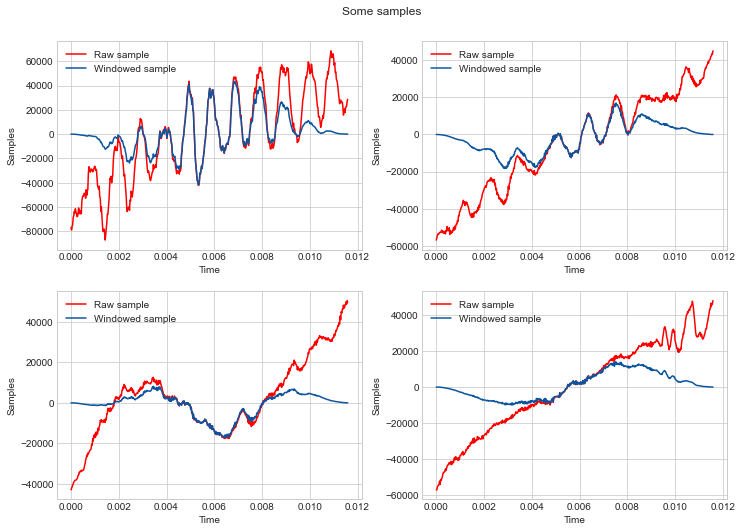

In [123]:
fig, ax = plot.subplots(2,2,figsize=(12,8))
from seaborn import set_palette, regplot
set_palette('Blues_r')

for sample_nr in [1,2,3,4]:
    samples = samplesd[sample_nr]['samples']
    samples_cor = samples - avg
    
    samples_cor_w = samples_cor * window
    
    if sample_nr == 1: i = 0; j = 0
    if sample_nr == 2: i = 0; j = 1
    if sample_nr == 4: i = 1; j = 1
    if sample_nr == 3: i = 1; j = 0
        
    ax[i][j].plot(time, samples_cor, 'r', label='Raw sample')
    ax[i][j].plot(time, samples_cor_w, label='Windowed sample')
    
    ax[i][j].grid(True)
    ax[i][j].legend()
    ax[i][j].set_xlabel('Time')
    ax[i][j].set_ylabel('Samples')
    
plot.subplots_adjust(top = 0.92);
plot.suptitle('Some samples')
plot.show()

fig.savefig('/Users/macoscar/Desktop/samples.png', dpi = 300, transparent=False, bbox_inches='tight')

In [ ]:
sample_nr = 4

samples = samplesd[sample_nr]['samples']
FFT_KIT_RAW = samplesd[sample_nr]['FFT_KIT_RAW']
FFT_KIT = samplesd[sample_nr]['FFT_KIT']

avg = np.mean(samples)
print ('avg: '+ str(avg))

samples_cor = samples - avg
samples_cor_w = samples_cor * window

fig, ax = plot.subplots(figsize=(12,8))
plot.plot(time, samples_cor)
plot.plot(time, samples_cor_w)
plot.grid()
plot.title('Samples')
plot.xlabel('Time')
plot.ylabel('Samples')
plot.show()

### FFT comparison

In [99]:
## From raw time samples
rms_samples_cor = rms(samples_cor)
print (f'RMS from time samples without windowing: {rms_samples_cor}')
db_samples_cor = db(rms_samples_cor)
print (f'in db : {db_samples_cor}')
print ('---')

## From FFT without windowing
fourierTransform = np.fft.fft(samples_cor)[0:int(samples_n/2)]/len(samples_cor)

# Exclude sampling frequency
fft_raw = np.abs(fourierTransform)
fft_raw[1:] *= 2

# Get rms and db
rms_fft_samples_cor = rms(fft_raw)*math.sqrt(len(fft_raw))/math.sqrt(2)
print (f'RMS from FFT without windowing: {rms_fft_samples_cor}')
db_fft_samples_cor = db(rms_fft_samples_cor)
print (f'in db : {db_fft_samples_cor}')

print (f'Numeric error: {(rms_samples_cor - rms_fft_samples_cor)/rms_samples_cor}')
print ('---')

## From windowed time samples
samples_cor_w = samples_cor * window

rms_samples_cor_w = rms(samples_cor_w)*1/rms(window)
print (f'RMS from time samples with windowing: {rms_samples_cor_w}')
db_samples_cor_w = db(rms_samples_cor_w)
print (f'in db : {db_samples_cor_w}')
print ('---')

## From FFT with windowing
fourierTransform = np.fft.fft(samples_cor_w)[0:int(samples_n/2)]/len(samples_cor_w)

# Exclude sampling frequency
fft_raw_w = np.abs(fourierTransform)
fft_raw_w[1:] *= 2

# Get rms and db
rms_fft_samples_cor_w = 1/rms(window)*rms(fft_raw_w)*math.sqrt(len(fft_raw_w))/math.sqrt(2)
print (f'RMS from FFT with windowing: {rms_fft_samples_cor_w}')
db_fft_samples_cor_w = db(rms_fft_samples_cor_w)
print (f'in db : {db_fft_samples_cor_w}')

print (f'Numeric error: {(rms_samples_cor_w - rms_fft_samples_cor_w)/rms_samples_cor_w}')
print ('---')

## Applying weighting and equalisation
a_weight_table = aw_norm(bins, True)
c_weight_table = cw_wiki(bins, True)

fft_weight_equal = fft_raw_w * equal_table * a_weight_table

rms_fft_samples_weight_equal = 1/rms(window)*rms(fft_weight_equal)*math.sqrt(len(fft_weight_equal))/math.sqrt(2)
print (f'RMS from FFT with windowing and weighting/equalisation: {rms_fft_samples_weight_equal}')
db_fft_samples_weight_equal = db(rms_fft_samples_weight_equal)
print (f'in db : {db_fft_samples_weight_equal}')
print ('---')
## From the kit
rms_fft_kit = 1/rms(window)*rms(FFT_KIT)*math.sqrt(len(FFT_KIT))/math.sqrt(2)
print (f'RMS from FFT from the KIT: {rms_fft_kit}')
db_fft_kit = db(rms_fft_kit)
print (f'DB from FFT KIT: {db_fft_kit}')
print (f'Numeric error: {(rms_fft_samples_weight_equal - rms_fft_kit)/rms_fft_samples_weight_equal}')

RMS from time samples without windowing: 24993.71848498284
in db : 66.47251951529739
---
RMS from FFT without windowing: 25083.822191831998
in db : 66.50377630976712
Numeric error: -0.0036050540820204303
---
RMS from time samples with windowing: 12017.920254199922
in db : 60.112488395800355
---
RMS from FFT with windowing: 11989.003506465579
in db : 60.09156378226085
Numeric error: 0.0024061357641508674
---
RMS from FFT with windowing and weighting/equalisation: 1318.9577371738098
in db : 40.920519634887015
---
RMS from FFT from the KIT: 2659.1829025223483
DB from FFT KIT: 47.01086623340818
Numeric error: -1.0161244197409232


/Users/macoscar/.virtualenvs/scdata/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning:

divide by zero encountered in log10

/Users/macoscar/.virtualenvs/scdata/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning:

divide by zero encountered in log10



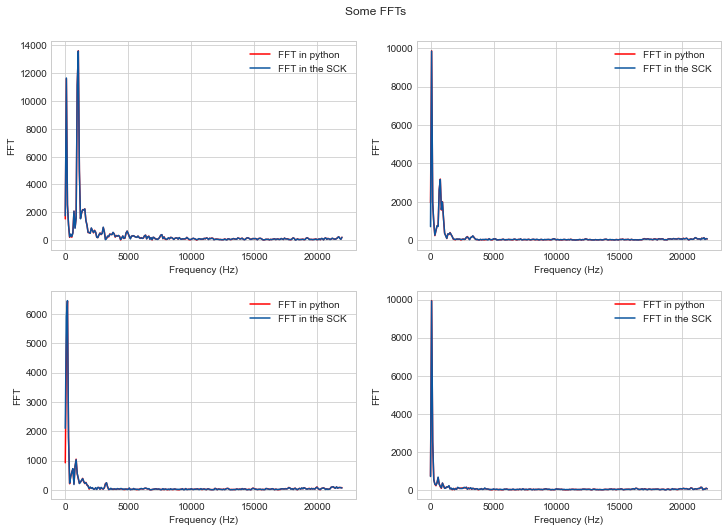

In [128]:
fig, ax = plot.subplots(2,2,figsize=(12,8))
from seaborn import set_palette, regplot
set_palette('Blues_r')

for sample_nr in [1,2,3,4]:
    samples = samplesd[sample_nr]['samples']
    FFT_KIT_RAW = samplesd[sample_nr]['FFT_KIT_RAW']
    
    samples_cor = samples - avg
    samples_cor_w = samples_cor * window
    
    ## From FFT without windowing
    fourierTransform = np.fft.fft(samples_cor_w)[0:int(samples_n/2)]/len(samples_cor)

    # Exclude sampling frequency
    fft_raw = np.abs(fourierTransform)
    fft_raw[1:] *= 2
    
    if sample_nr == 1: i = 0; j = 0
    if sample_nr == 2: i = 0; j = 1
    if sample_nr == 4: i = 1; j = 1
    if sample_nr == 3: i = 1; j = 0
    
    
    ax[i][j].plot(bins, fft_raw, 'r', label='FFT in python')
    ax[i][j].plot(bins, FFT_KIT_RAW, label='FFT in the SCK')
    
    ax[i][j].grid(True)
    ax[i][j].legend()
    ax[i][j].set_xlabel('Frequency (Hz)')
    ax[i][j].set_ylabel('FFT')
    
plot.subplots_adjust(top = 0.92);
plot.suptitle('Some FFTs')
plot.show()

fig.savefig('/Users/macoscar/Desktop/ffts.png', dpi = 300, transparent=False, bbox_inches='tight')

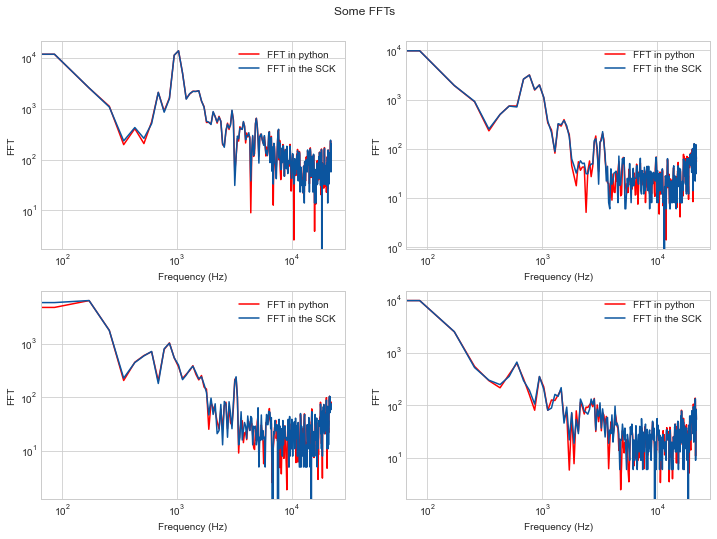

In [129]:
fig, ax = plot.subplots(2,2,figsize=(12,8))
from seaborn import set_palette, regplot
set_palette('Blues_r')

for sample_nr in [1,2,3,4]:
    samples = samplesd[sample_nr]['samples']
    FFT_KIT_RAW = samplesd[sample_nr]['FFT_KIT_RAW']
    
    samples_cor = samples - avg
    samples_cor_w = samples_cor * window
    
    ## From FFT without windowing
    fourierTransform = np.fft.fft(samples_cor_w)[0:int(samples_n/2)]/len(samples_cor)

    # Exclude sampling frequency
    fft_raw = np.abs(fourierTransform)
    fft_raw[1:] *= 2
    
    if sample_nr == 1: i = 0; j = 0
    if sample_nr == 2: i = 0; j = 1
    if sample_nr == 4: i = 1; j = 1
    if sample_nr == 3: i = 1; j = 0
    
    
    ax[i][j].loglog(bins, fft_raw, 'r', label='FFT in python')
    ax[i][j].loglog(bins, FFT_KIT_RAW, label='FFT in the SCK')
    
    ax[i][j].grid(True)
    ax[i][j].legend()
    ax[i][j].set_xlabel('Frequency (Hz)')
    ax[i][j].set_ylabel('FFT')
    
plot.subplots_adjust(top = 0.92);
plot.suptitle('Some FFTs')
plot.show()

fig.savefig('/Users/macoscar/Desktop/fftslog.png', dpi = 300, transparent=False, bbox_inches='tight')

### Spectrum comparison

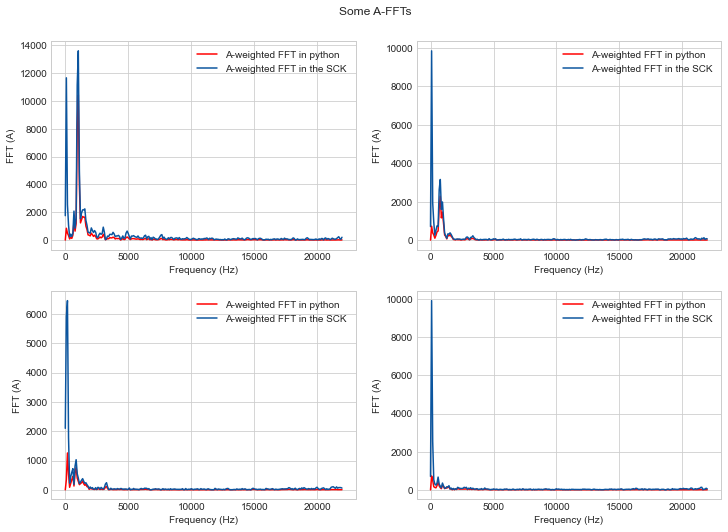

In [130]:
fig, ax = plot.subplots(2,2,figsize=(12,8))
from seaborn import set_palette, regplot
set_palette('Blues_r')

for sample_nr in [1,2,3,4]:
    samples = samplesd[sample_nr]['samples']
    FFT_KIT_RAW = samplesd[sample_nr]['FFT_KIT_RAW']
    FFT_KIT = samplesd[sample_nr]['FFT_KIT_RAW']
    samples_cor = samples - avg
    samples_cor_w = samples_cor * window
    
    ## From FFT without windowing
    fourierTransform = np.fft.fft(samples_cor_w)[0:int(samples_n/2)]/len(samples_cor)

    # Exclude sampling frequency
    fft_raw = np.abs(fourierTransform)
    fft_raw[1:] *= 2
    
    fft_weight_equal = fft_raw * equal_table * a_weight_table
    
    if sample_nr == 1: i = 0; j = 0
    if sample_nr == 2: i = 0; j = 1
    if sample_nr == 4: i = 1; j = 1
    if sample_nr == 3: i = 1; j = 0
    
    ax[i][j].plot(bins, fft_weight_equal, 'r', label='A-weighted FFT in python')
    ax[i][j].plot(bins, FFT_KIT, label='A-weighted FFT in the SCK')
    
    ax[i][j].grid(True)
    ax[i][j].legend()
    ax[i][j].set_xlabel('Frequency (Hz)')
    ax[i][j].set_ylabel('FFT (A)')
    
plot.subplots_adjust(top = 0.92);
plot.suptitle('Some A-FFTs')
plot.show()

fig.savefig('/Users/macoscar/Desktop/affts.png', dpi = 300, transparent=False, bbox_inches='tight')

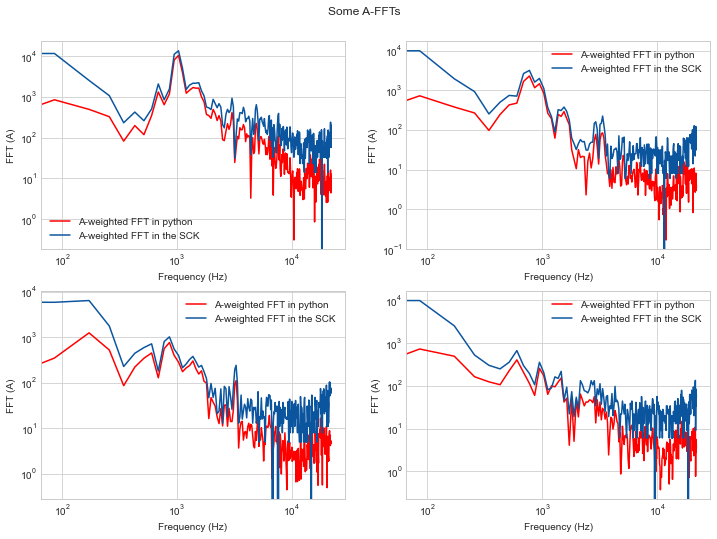

In [131]:
fig, ax = plot.subplots(2,2,figsize=(12,8))
from seaborn import set_palette, regplot
set_palette('Blues_r')

for sample_nr in [1,2,3,4]:
    samples = samplesd[sample_nr]['samples']
    FFT_KIT_RAW = samplesd[sample_nr]['FFT_KIT_RAW']
    FFT_KIT = samplesd[sample_nr]['FFT_KIT_RAW']
    samples_cor = samples - avg
    samples_cor_w = samples_cor * window
    
    ## From FFT without windowing
    fourierTransform = np.fft.fft(samples_cor_w)[0:int(samples_n/2)]/len(samples_cor)

    # Exclude sampling frequency
    fft_raw = np.abs(fourierTransform)
    fft_raw[1:] *= 2
    
    fft_weight_equal = fft_raw * equal_table * a_weight_table
    
    if sample_nr == 1: i = 0; j = 0
    if sample_nr == 2: i = 0; j = 1
    if sample_nr == 4: i = 1; j = 1
    if sample_nr == 3: i = 1; j = 0
    
    ax[i][j].loglog(bins, fft_weight_equal, 'r', label='A-weighted FFT in python')
    ax[i][j].loglog(bins, FFT_KIT, label='A-weighted FFT in the SCK')
    
    ax[i][j].grid(True)
    ax[i][j].legend()
    ax[i][j].set_xlabel('Frequency (Hz)')
    ax[i][j].set_ylabel('FFT (A)')
    
plot.subplots_adjust(top = 0.92);
plot.suptitle('Some A-FFTs')
plot.show()

fig.savefig('/Users/macoscar/Desktop/afftslog.png', dpi = 300, transparent=False, bbox_inches='tight')

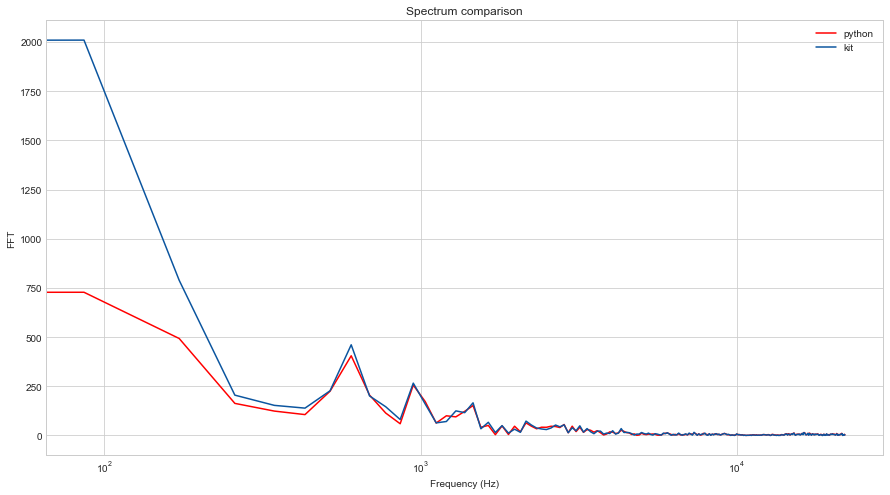

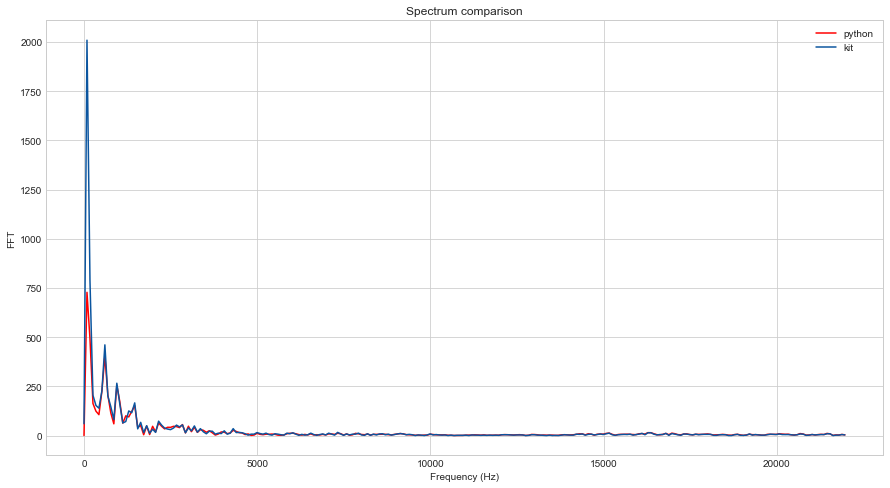

In [103]:
fig, ax = plot.subplots(figsize = (15,8))
ax.semilogx(bins, abs(fft_weight_equal), 'r', label = 'python')
ax.semilogx(bins, FFT_KIT, label = 'kit')
plot.legend(loc='best')
plot.title('Spectrum comparison')
plot.xlabel('Frequency (Hz)')
plot.ylabel('FFT')
plot.grid(True)
plot.show()

fig, ax = plot.subplots(figsize = (15,8))
ax.plot(bins, abs(fft_weight_equal), 'r', label = 'python')
ax.plot(bins, FFT_KIT, label = 'kit')
plot.legend(loc='best')
plot.grid(True)
plot.title('Spectrum comparison')
plot.xlabel('Frequency (Hz)')
plot.ylabel('FFT')
plot.show()

1281.9379667787398


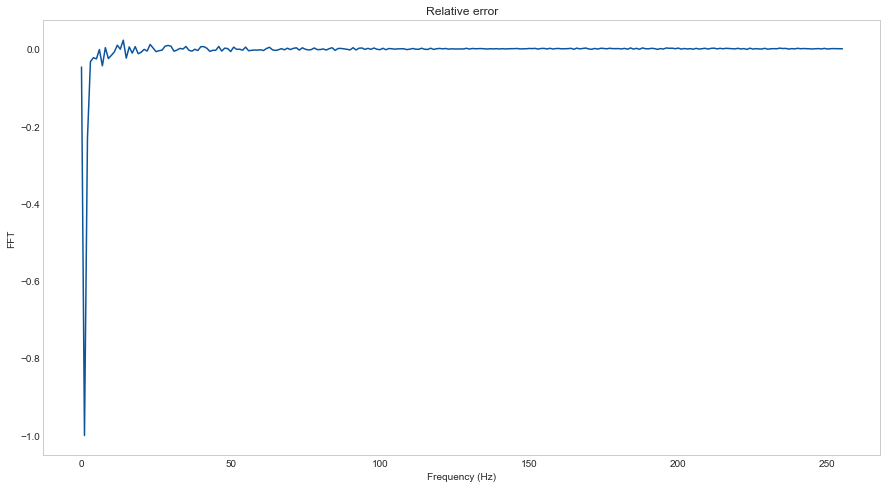

In [104]:
# Error
errl = (fft_weight_equal-FFT_KIT)
errm = np.max(np.ma.masked_invalid(np.abs(errl)))
print (errm)

fig, ax = plot.subplots(figsize = (15,8))
plot.plot(errl/errm)
plot.grid()
plot.xlabel('Frequency (Hz)')
plot.ylabel('FFT')
plot.title('Relative error')
plot.show()

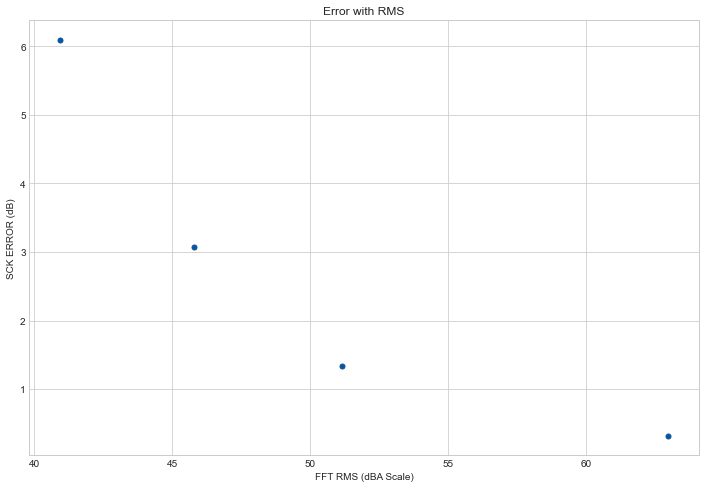

In [136]:
rmss = list()
errors = list()
for _sample_nr in samplesd.keys():
    samples = samplesd[_sample_nr]['samples']
    FFT_KIT_RAW = samplesd[_sample_nr]['FFT_KIT_RAW']
    FFT_KIT = samplesd[_sample_nr]['FFT_KIT']
    
    avg = np.mean(samples)
    samples_cor = samples - avg
    samples_cor_w = samples_cor * window
    
    ## From FFT with windowing
    fourierTransform = np.fft.fft(samples_cor_w)[0:int(samples_n/2)]/len(samples_cor_w)

    # Exclude sampling frequency
    fft_raw_w = np.abs(fourierTransform)
    fft_raw_w[1:] *= 2

    fft_weight_equal = fft_raw_w * equal_table * a_weight_table

    rms_fft_samples_weight_equal = 1/rms(window)*rms(fft_weight_equal)*math.sqrt(len(fft_weight_equal))/math.sqrt(2)
    db_fft_samples_weight_equal = db(rms_fft_samples_weight_equal)

    ## From the kit
    rms_fft_kit = 1/rms(window)*rms(FFT_KIT)*math.sqrt(len(FFT_KIT))/math.sqrt(2)
    db_fft_kit = db(rms_fft_kit)
    
    rmss.append(db_fft_samples_weight_equal)
    errors.append(db_fft_kit - db_fft_samples_weight_equal)

fig, ax = plot.subplots(figsize=(12,8))
plot.plot(rmss, errors, '.', markersize='10')
plot.title('Error with RMS')
plot.grid(True)
plot.xlabel('FFT RMS (dBA Scale)')
plot.ylabel('SCK ERROR (dB)')
fig.savefig('/Users/macoscar/Desktop/rms.png', dpi = 300, transparent=False, bbox_inches='tight')

## Correction

In [106]:
# Problem
export_a_table = np.int64(equal_table * a_weight_table * 65535)
export_c_table = np.int64(equal_table * c_weight_table * 65535)

print (export_a_table)
print (export_c_table)

[    0  4798 12805 19307 27461 32110 37668 41785 41757 47047 48234 47668
 50239 51293 51673 49958 50861 49554 48285 47046 45382 45525 42435 39061
 38334 36316 33264 32466 29692 29811 30127 26577 27970 26894 27839 30262
 26276 28847 31800 26913 26568 26237 25919 25616 25326 25050 24786 24536
 24298 24073 23860 23659 23471 23293 23127 22973 22830 22699 22578 22467
 22368 22280 22201 22134 22077 21866 21825 21619 21592 21392 21192 20992
 20794 20596 20400 20410 20430 20461 20278 20095 19913 19731 19788 19612
 19436 19511 19339 19169 18999 18831 18663 18496 18330 18165 17467 17831
 16822 17419 16878 17297 17510 17699 17428 17307 15743 15593 14063 12901
 12750 11160 11414 10062 10547  9688 10058  9279  9523  8205  8049  7820
  7653  7605  7756  7189  7110  7595  7199  7331  7187  6972  7137  6933
  7065  7304  7675  7784  7942  7434  7721  7930  8238  8387  8227  8514
  8753  8941  9145  9098  9357  8942  9594  8909  9547  9520  9452 10212
  9876 10438 10551 10572 10844 11093 11432 11446 12

## Root of all evil

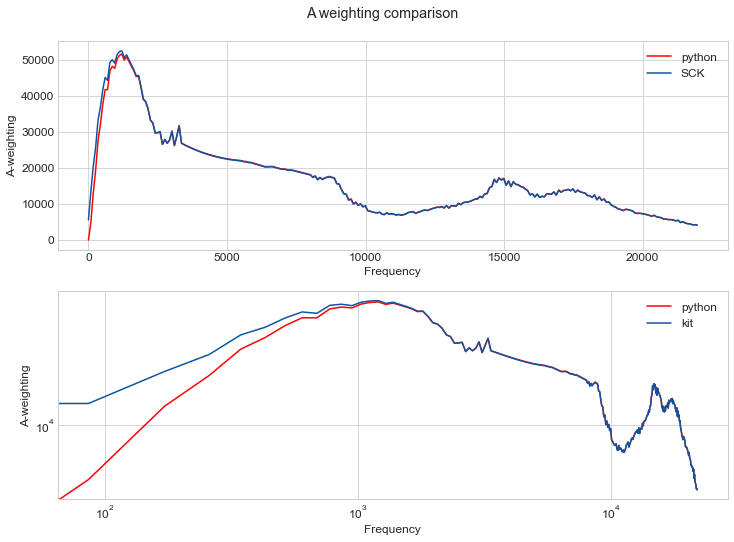

In [149]:
fig, ax = plot.subplots(2, 1, figsize = (12,8))

ax[0].plot(bins, export_a_table, 'r', label='python')
ax[0].plot(bins, a_weight_table_comb_kit, label='SCK')
ax[0].grid(True)

ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('A-weighting')
ax[0].legend(loc='best')

ax[1].loglog(bins, export_a_table, 'r', label='python')
ax[1].loglog(bins, a_weight_table_comb_kit, label='kit')
ax[1].grid(True)

ax[1].legend(loc='best')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('A-weighting')
plot.suptitle('A weighting comparison')
plot.subplots_adjust(top = 0.92);
plot.show()

fig.savefig('/Users/macoscar/Desktop/aweight-comp.png', dpi = 300, transparent=False, bbox_inches='tight')

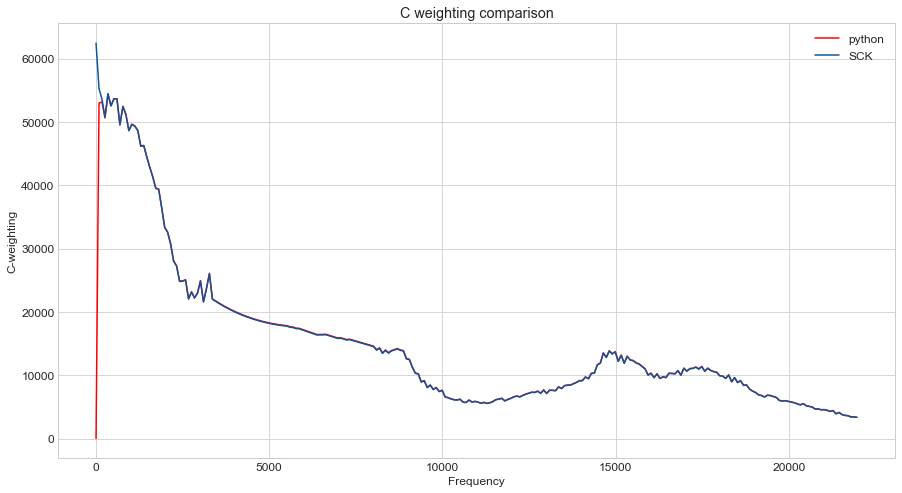

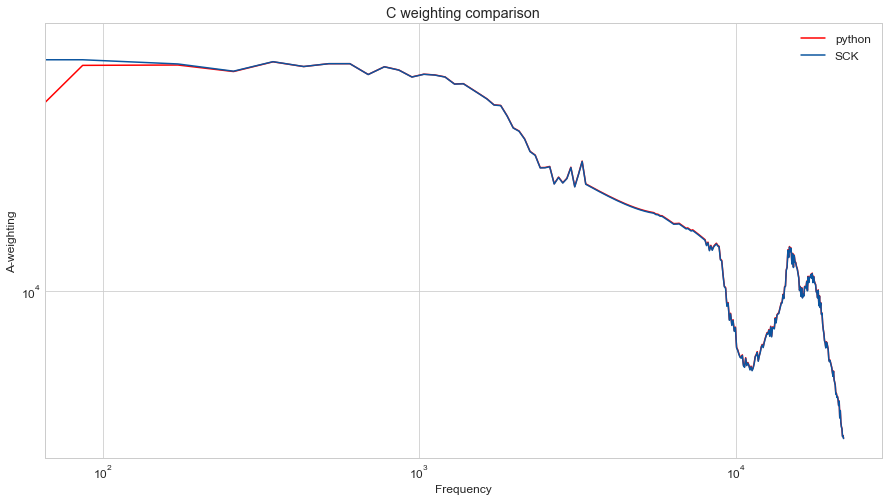

In [160]:
fig, ax = plot.subplots(figsize = (15,8))

plot.plot(bins, export_c_table,'r' , label='python')
plot.plot(bins, c_weight_table_comb_kit, label='SCK')
plot.grid(True)
plot.title('C weighting comparison')
plot.xlabel('Frequency')
plot.ylabel('C-weighting')
plot.legend(loc='best')
plot.show()

fig, ax = plot.subplots(figsize = (15,8))
plot.loglog(bins, export_c_table,'r' , label='python')
plot.loglog(bins, c_weight_table_comb_kit, label='SCK')
plot.grid(True)
plot.title('C weighting comparison')
plot.legend(loc='best')
plot.xlabel('Frequency')
plot.ylabel('A-weighting')
plot.show()

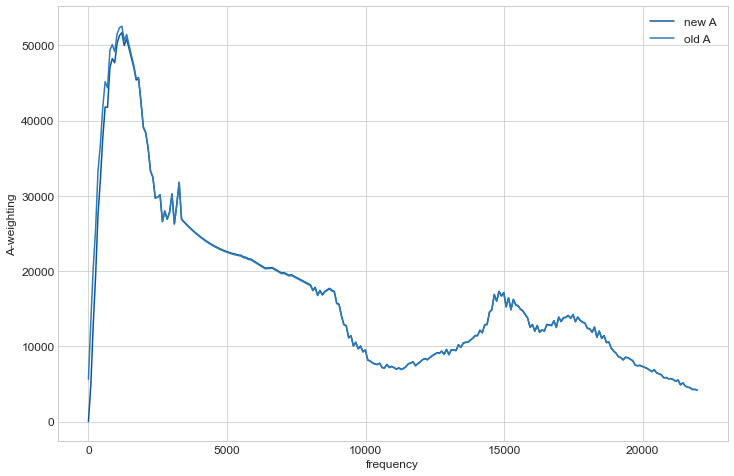

In [163]:
# Double checking things
new_a = np.array([0,  4798, 12805, 19307, 27461, 32110, 37668, 41785, 41757, 47047, 48234, 47668, 50239, 51293, 51673, 49958, 50861, 49554, 48285, 47046, 45382, 45525, 42435, 39061, 38334, 36316, 33264, 32466, 29692, 29811, 30127, 26577, 27970, 26894, 27839, 30262, 26276, 28847, 31800, 26913, 26568, 26237, 25919, 25616, 25326, 25050, 24786, 24536, 24298, 24073, 23860, 23659, 23471, 23293, 23127, 22973, 22830, 22699, 22578, 22467, 22368, 22280, 22201, 22134, 22077, 21866, 21825, 21619, 21592, 21392, 21192, 20992, 20794, 20596, 20400, 20410, 20430, 20461, 20278, 20095, 19913, 19731, 19788, 19612, 19436, 19511, 19339, 19169, 18999, 18831, 18663, 18496, 18330, 18165, 17467, 17831, 16822, 17419, 16878, 17297, 17510, 17699, 17428, 17307, 15743, 15593, 14063, 12901, 12750, 11160, 11414, 10062, 10547,  9688, 10058,  9279,  9523,  8205,  8049,  7820,  7653,  7605,  7756,  7189,  7110,  7595,  7199,  7331,  7187,  6972,  7137,  6933,  7065,  7304,  7675,  7784,  7942,  7434,  7721,  7930,  8238,  8387,  8227,  8514,  8753,  8941,  9145,  9098,  9357,  8942,  9594,  8909,  9547,  9520,  9452, 10212,  9876, 10438, 10551, 10572, 10844, 11093, 11432, 11446, 12156, 11826, 12866, 12936, 14566, 14898, 16898, 16028, 17313, 16725, 17139, 15273, 16465, 14886, 16255, 15531, 15393, 14950, 14722, 14254, 13766, 12553, 12901, 12023, 12776, 11879, 12195, 12044, 12899, 12859, 12786, 13409, 12524, 13896, 13315, 13811, 13867, 14114, 13737, 14226, 13302, 13904, 13452, 13225, 13088, 12412, 12334, 11876, 12563, 11210, 12033, 11062, 11433, 10512, 10592,  9781,  9379,  9098,  8635,  8506,  8204,  8561,  8490,  8302,  8097,  7525,  7413,  7478,  7344,  7195,  7074,  6861,  6647,  6897,  6479,  6356,  6223,  5829,  5848,  5684,  5713,  5586,  5353,  5525,  4885,  5150,  4728,  4573,  4507,  4258,  4278,  4194])
old_a = np.array([5634,13278,20377,25571,33231,36831,41717,45166,44354,49335,50092,49140,51493,52337,52535,50645,51438,50019,48660,47347,45621,45720,42583,39168,38415,36373,33300,32487,29699,29808,30115,26560,27943,26862,27801,30214,26229,28790,31734,26853,26504,26170,25850,25544,25252,24974,24709,24457,24218,23991,23777,23575,23385,23206,23040,22885,22741,22608,22486,22375,22275,22185,22106,22038,21980,21769,21727,21521,21494,21293,21094,20895,20696,20499,20302,20312,20332,20361,20178,19996,19814,19634,19689,19513,19338,19412,19241,19071,18902,18734,18567,18400,18235,18071,17376,17738,16734,17327,16790,17207,17418,17606,17336,17216,15660,15511,13990,12832,12683,11102,11355,10008,10491,9638,10005,9231,9473,8162,8007,7779,7613,7565,7716,7151,7073,7556,7161,7294,7150,6936,7101,6897,7029,7267,7636,7744,7902,7396,7681,7890,8197,8345,8186,8472,8709,8896,9099,9053,9311,8898,9547,8866,9500,9474,9406,10163,9829,10388,10500,10521,10792,11040,11378,11392,12099,11771,12807,12876,14499,14830,16820,15955,17235,16650,17062,15204,16392,14820,16183,15462,15325,14885,14658,14192,13707,12499,12846,11972,12722,11829,12144,11994,12845,12806,12733,13354,12473,13839,13261,13756,13812,14058,13683,14170,13249,13849,13399,13174,13038,12365,12287,11832,12516,11168,11989,11021,11391,10473,10553,9745,9346,9065,8604,8475,8175,8531,8461,8273,8070,7499,7388,7452,7320,7170,7051,6838,6625,6875,6458,6335,6203,5810,5829,5667,5695,5569,5337,5508,4870,5135,4714,4559,4493,4246,4265,4182])

fig, ax = plot.subplots(figsize=(12,8))
plot.plot(bins, new_a, label = 'new A')
plot.plot(bins, old_a, label = 'old A')
plot.grid(True)
plot.legend()
plot.xlabel('frequency')
plot.ylabel('A-weighting')
plot.show()

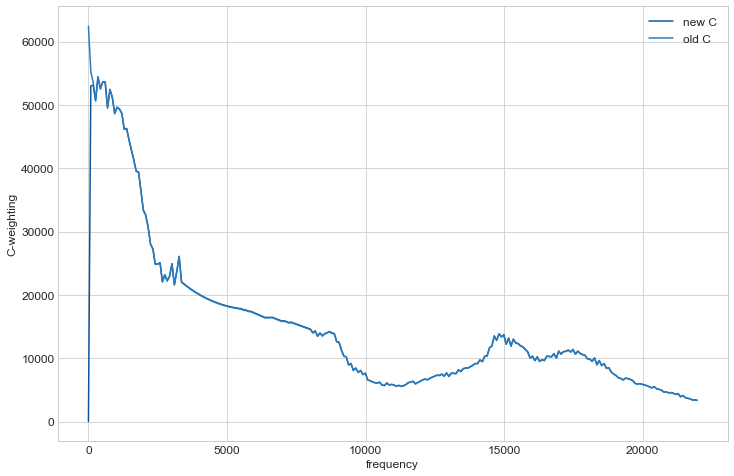

In [164]:
# Double checking things
new_c = np.array([0, 52984, 53123, 50615, 54391, 52516, 53644, 53654, 49527, 52449, 51195, 48636, 49638, 49359, 48646, 46175, 46285, 44503, 42874, 41366, 39565, 39395, 36482, 33388, 32599, 30743, 28045, 27272, 24860, 24885, 25081, 22072, 23177, 22239, 22978, 24934, 21616, 23696, 26087, 22051, 21743, 21448, 21167, 20900, 20645, 20403, 20173, 19955, 19748, 19552, 19368, 19194, 19031, 18877, 18734, 18601, 18477, 18363, 18258, 18162, 18076, 17998, 17929, 17870, 17818, 17644, 17605, 17435, 17409, 17244, 17079, 16915, 16752, 16589, 16428, 16433, 16446, 16468, 16318, 16168, 16020, 15872, 15915, 15771, 15628, 15686, 15546, 15408, 15269, 15132, 14996, 14860, 14726, 14591, 14029, 14321, 13509, 13987, 13552, 13887, 14057, 14208, 13990, 13891, 12635, 12514, 11286, 10352, 10231,  8954,  9158,  8072,  8461,  7772,  8068,  7442,  7638,  6580,  6455,  6271,  6137,  6098,  6219,  5764,  5700,  6089,  5771,  5877,  5761,  5589,  5721,  5557,  5663,  5854,  6151,  6238,  6365,  5958,  6187,  6355,  6601,  6721,  6592,  6822,  7013,  7163,  7327,  7289,  7497,  7164,  7686,  7137,  7648,  7626,  7571,  8181,  7911,  8361,  8451,  8468,  8686,  8885,  9157,  9167,  9736,  9472, 10305, 10360, 11666, 11931, 13532, 12836, 13865, 13394, 13725, 12230, 13185, 11920, 13016, 12436, 12326, 11971, 11788, 11413, 11022, 10051, 10330,  9626, 10229,  9511,  9763,  9643, 10327, 10295, 10236, 10735, 10026, 11125, 10659, 11057, 11102, 11299, 10997, 11388, 10648, 11130, 10768, 10587, 10477,  9936,  9873,  9507, 10057,  8973,  9632,  8854,  9151,  8414,  8478,  7829,  7507,  7282,  6912,  6808,  6567,  6852,  6796,  6645,  6481,  6023,  5933,  5985,  5878,  5758,  5662,  5491,  5320,  5520,  5186,  5086,  4980,  4665,  4680,  4549,  4572,  4471,  4284,  4422,  3909,  4121,  3784,  3659,  3606,  3408,  3423,  3356])
old_c = np.array([62418,55227,53541,50749,54449,52537,53645,53642,49507,52420,51160,48597,49593,49309,48592,46119,46224,44440,42810,41300,39499,39326,36416,33324,32534,30680,27984,27211,24802,24825,25019,22016,23116,22180,22915,24864,21553,23625,26008,21982,21673,21379,21097,20830,20575,20332,20102,19883,19676,19480,19295,19121,18957,18804,18660,18527,18402,18288,18183,18087,18000,17922,17853,17792,17741,17566,17527,17357,17331,17165,17001,16837,16674,16512,16351,16356,16369,16390,16240,16091,15943,15795,15838,15694,15551,15608,15469,15331,15194,15057,14921,14786,14652,14518,13959,14249,13441,13916,13483,13817,13986,14136,13918,13821,12571,12451,11229,10299,10179,8909,9112,8031,8418,7732,8027,7405,7600,6547,6423,6240,6106,6068,6189,5735,5672,6059,5742,5849,5733,5561,5693,5530,5635,5826,6121,6208,6335,5929,6157,6325,6570,6689,6561,6790,6980,7129,7292,7255,7462,7130,7650,7104,7613,7591,7537,8143,7875,8323,8413,8430,8647,8845,9116,9127,9693,9430,10259,10315,11615,11880,13474,12781,13805,13337,13666,12179,13129,11870,12962,12384,12275,11922,11740,11366,10978,10011,10288,9588,10189,9473,9725,9605,10287,10255,10197,10694,9988,11082,10619,11015,11060,11257,10957,11346,10609,11089,10729,10548,10439,9901,9838,9473,10021,8942,9599,8824,9120,8385,8449,7802,7482,7258,6889,6786,6545,6830,6774,6624,6460,6004,5914,5966,5860,5740,5645,5474,5304,5504,5170,5072,4966,4651,4666,4536,4559,4458,4272,4409,3898,4110,3774,3650,3597,3399,3414,3347])

fig, ax = plot.subplots(figsize=(12,8))
plot.plot(bins, new_c, label = 'new C')
plot.plot(bins, old_c, label = 'old C')
plot.grid(True)
plot.legend()
plot.xlabel('frequency')
plot.ylabel('C-weighting')
plot.show()

## Kit comparison

In [5]:
import scdata as sc
sc._config.config.load_cached_api = False
test = sc.Test('NOISE')

[INFO]: 77 --- 2020_06_NOISE_WEIGHT-TABLES
[INFO]: 126 --- 2018-12_INT_NOISE_SAMPLING


Similar tests found, please select one or input other name [New]:  77


[INFO]: Test full name, 2020_06_NOISE_WEIGHT-TABLES


In [167]:
test.load()

[WARNING]: Requesting all available data
[WARNING]: No data in request for sensor: 89
[WARNING]: No data in request for sensor: 88
[WARNING]: No data in request for sensor: 87
[SUCCESS]: Device 13012 loaded successfully from API
[WARNING]: Removing sensors from device: ['PM_1', 'PM_10', 'PM_25']
[SUCCESS]: File saved to: 
/Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-data/data/processed/2020/06/2020_06_NOISE_WEIGHT-TABLES/cached/13012.csv
[SUCCESS]: Device 13012 has been loaded
[WARNING]: Requesting all available data
[WARNING]: No data in request for sensor: 89
[WARNING]: No data in request for sensor: 88
[WARNING]: No data in request for sensor: 87
[SUCCESS]: Device 13013 loaded successfully from API
[WARNING]: Removing sensors from device: ['PM_1', 'PM_10', 'PM_25']
[SUCCESS]: File saved to: 
/Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-data/data/processed/2020/06

<Figure size 432x288 with 0 Axes>

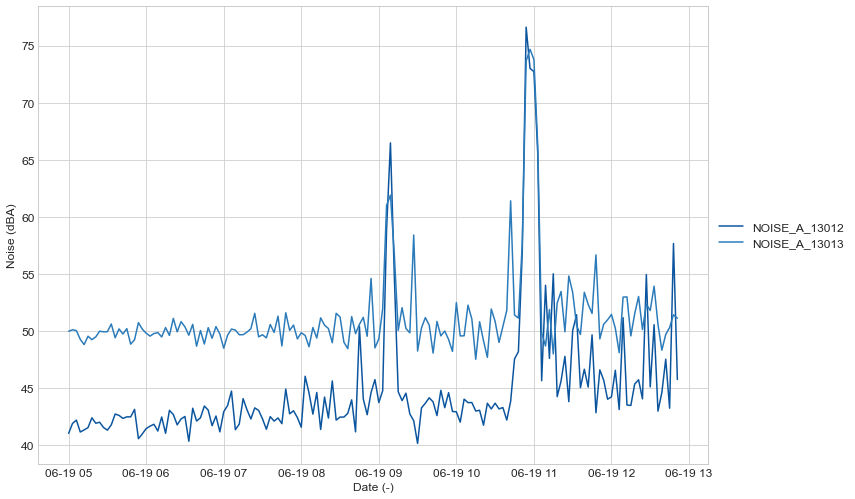

In [168]:
traces = {
            "1": {"devices": "all",
                  "channel": "NOISE_A",
                  "subplot": 1},
        }
options = {'frequency': '3Min', 'min_date': '2020-06-19 05:00'}
formatting = {'palette': 'Blues_r', 'ylabel': {1: 'Noise (dBA)'}, 'fontsize': 12}

figure = test.ts_plot(traces = traces, options = options, formatting = formatting);
figure.savefig('/Users/macoscar/Desktop/time-comp.png', dpi = 300, transparent=False, bbox_inches='tight')

gray


<Figure size 432x288 with 0 Axes>

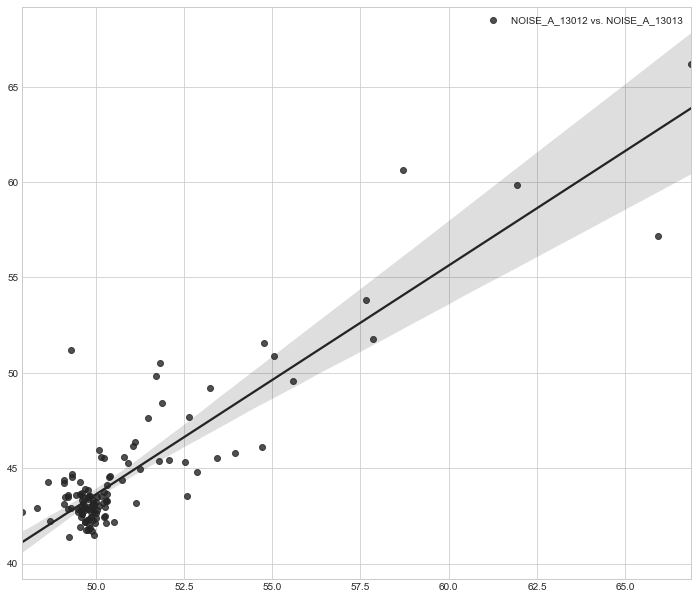

In [165]:
traces = {
            "1": {"devices": "13013",
                  "channel": "NOISE_A"},
            "2": {"devices": "13012",
                  "channel": "NOISE_A"}  
        }


options = {'frequency': '10Min', 'min_date': '2020-06-18 17:00'}

formatting = {
              "grid": True,
              "legend": True,
              "height": 10,
              "suptitle_factor": 0.92,
              "style": "seaborn-whitegrid",
              "palette": "gray"
              }

figure = test.scatter_plot(traces = traces, options = options, formatting = formatting);